# MIMIC-EYE 1.0 - An Eye-Tracking Data Analytics Toolkit for REFLACX and EYE GAZE

In [6]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)

import numpy as np
import os
import sys
import shutil
import pickle as pkl
import matplotlib.pyplot as plt

%matplotlib inline



In [7]:
from mimic.Patient import Patient
from mimic.Xray import Xray
from MIMIC_EYE import MIMIC_EYE 
from Constants import Constants as c
from data.groundtruth.BoundingBox import BoundingBox
from data.groundtruth.Ellipse import Ellipse

from util.mimic_data_processing import *

In [8]:
# starting program
mimic_eye = MIMIC_EYE()

In [9]:
# check if file CACHE_PATH exists
# if it does, load the state
# if it does not, initialize the MIMIC_EYE database
if os.path.exists( c.CACHE_PATH ):
  print("Loading previously saved state...")
  mimic_eye.load_state()
else:
  print("Initializing MIMIC_EYE database...")
  mimic_eye.initialize_mimic_eye()
  mimic_eye.save_state()

Loading previously saved state...


In [10]:
# checking a patient
ref_patient = c.CACHE["PATIENTS"][12629893]
ref_xrays = ref_patient.getXray_lst()
cxr = ref_xrays[0]
cxr.getInfo()

{'ID': 'f0256c5c-a68a55ba-51e7cc78-c6aa82eb-7d0eb5fe',
 'study_id': 's51632471',
 'report': 'FINAL REPORT\nCHEST RADIOGRAPH PERFORMED ON ___\n\nCOMPARISON:  ___.\n\nCLINICAL HISTORY:  Shortness of breath and chest pain.\n\nFINDINGS:  PA and lateral views of the chest were obtained.  Midline\nsternotomy wires and mediastinal clips are again noted. There is a background\nof emphysema better appreciated on the prior radiographs. There has been\ninterval development of pulmonary vascular congestion and mild pulmonary\nedema.  Trace bilateral pleural effusions are present.  No pneumothorax.\nCardiomediastinal silhouette is stable.  Bony structures are intact.\n\nIMPRESSION:  Emphysema with superimposed pulmonary edema.  Trace bilateral\npleural effusions.\n',
 'diagnosis': 'CHF',
 'dicom_path': '/Volumes/SD_DISK/XAMI-MIMICv2.0/patient_12629893/CXR-DICOM/s51632471/f0256c5c-a68a55ba-51e7cc78-c6aa82eb-7d0eb5fe.dcm',
 'jpg_path': '/Volumes/SD_DISK/XAMI-MIMICv2.0/patient_12629893/CXR-JPG/s516324

In [11]:
patient2 = c.CACHE["PATIENTS"][c.CACHE['OVERLAP'][1]]
cxr2 = patient2.getXray_lst()[0]
cxr2

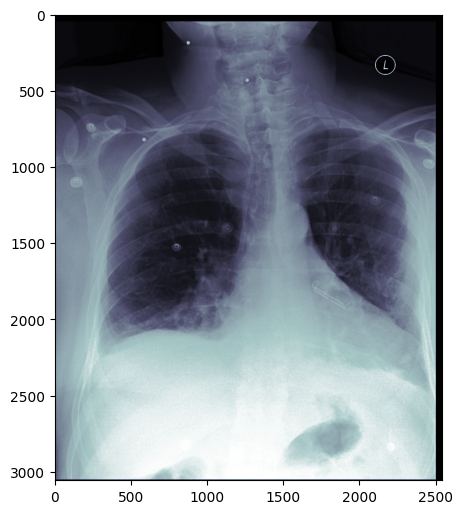

In [12]:
cxr2.xray_figure();

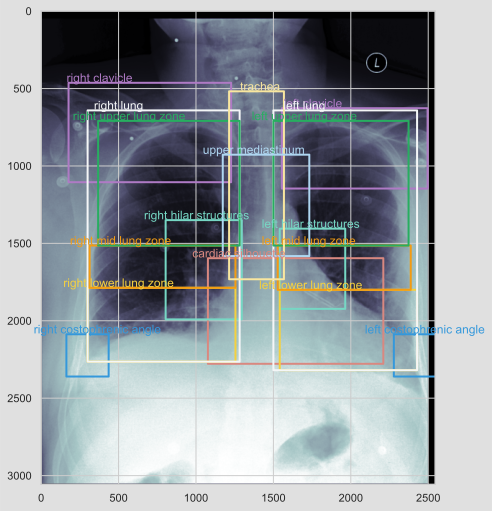

In [327]:
annotation_labels = ["LEFT LOWER LUNG ZONE", "RIGHT LOWER LUNG ZONE", "LEFT MID LUNG ZONE", "RIGHT MID LUNG ZONE", "LEFT UPPER LUNG ZONE", "RIGHT UPPER LUNG ZONE", "RIGHT CLAVICLE", "LEFT CLAVICLE", ]
cxr2.plot_bounding_boxess(annotation_labels = None, label=True, figsize=(7,10), fontsize=12)


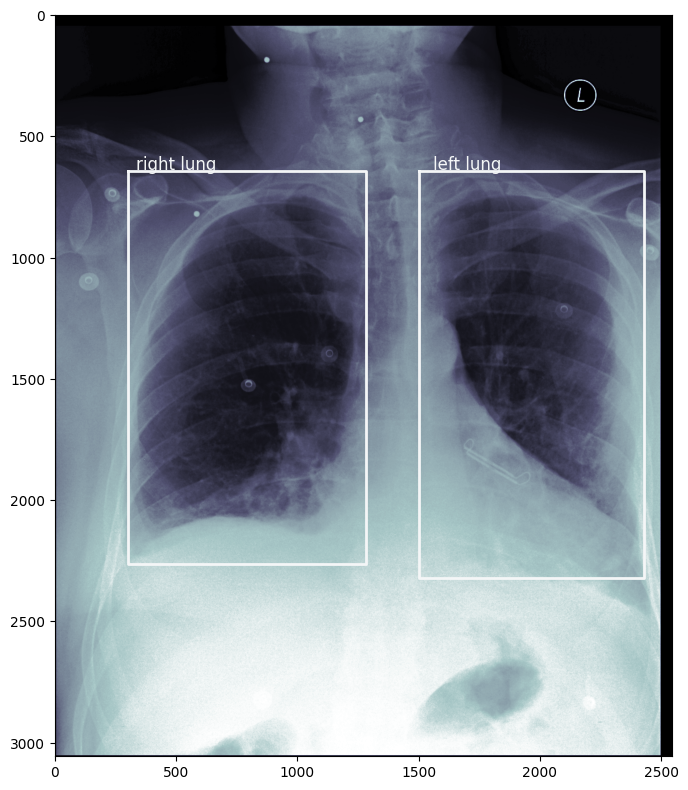

In [14]:
annotation_labels = ["LEFT LUNG","RIGHT LUNG"]
cxr2.plot_bounding_boxess(annotation_labels = annotation_labels, label=True, figsize=(7,10), fontsize=12)

dict_keys(['P300R227438'])
Number of radiologists annotating the image: 1


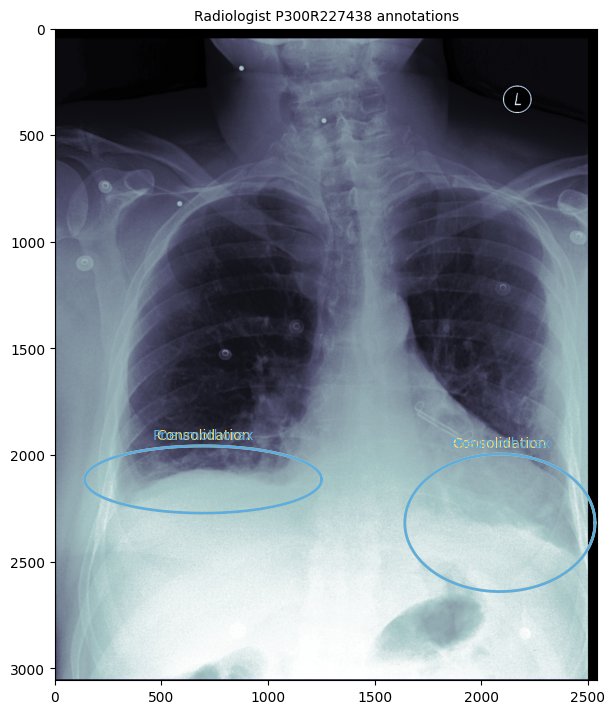

In [15]:
cxr2.plot_abnormalities( figsize=(7,10) );

# EVENT LOG

In [66]:
eye_gaze_sheet =  "/Volumes/SD_DISK/eye_gaze.csv"
gaze_df = pd.read_csv(eye_gaze_sheet)
gaze_df.head()

SESSION_ID  MEDIA_ID                                      DICOM_ID  CNT  \
0           1         0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b    0   
1           1         0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b    1   
2           1         0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b    2   
3           1         0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b    3   
4           1         0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b    4   

   Time (in secs)  TIMETICK(f=10000000)    FPOGX    FPOGY    FPOGS    FPOGD  \
0         0.00000          6.962092e+11  0.26427  0.18867  0.00000  0.00000   
1         0.01794          6.962093e+11  0.49027  0.37940  0.00000  0.00000   
2         0.02826          6.962094e+11  0.47102  0.37907  0.00000  0.00000   
3         0.04449          6.962096e+11  0.46275  0.37678  0.00000  0.00000   
4         0.06177          6.962098e+11  0.46065  0.36778  0.01794  0.04382   

   FPOGID  FPOGV    BPOGX    BPOGY  BPOGV     LPCX     LPCY       LPD  \
0       1      0  0.52854  0.37735      1  0.38281  0.59384  17.19830   
1       1      0  0.45200  0.38146      1  0.38156  0.59378  17.47636   
2       1      0  0.45178  0.37874      1  0.38054  0.59316  16.56400   
3       1      0  0.44619  0.37220      1  0.37976  0.59301  17.02368   
4       2      1  0.45437  0.34077      1  0.37967  0.59296  16.84176   

       LPS  LPV     RPCX     RPCY       RPD      RPS  RPV  BKID    BKDUR  \
0  0.98505    1  0.64184  0.59797  16.76225  0.98505    1     0  0.22803   
1  0.98505    1  0.64049  0.59770  17.21498  0.98505    1     0  0.00000   
2  0.98505    1  0.63954  0.59721  16.91772  0.99209    1     0  0.00000   
3  0.99209    1  0.63827  0.59704  17.39603  0.99912    1     0  0.00000   
4  0.99912    1  0.63828  0.59696  17.44879  1.00616    1     0  0.00000   

   BKPMIN     LPMM  LPMMV     RPMM  RPMMV  SACCADE_MAG  SACCADE_DIR  \
0      20  3.36265      1  3.44732      1          0.0          0.0   
1      20  3.49799      1  3.47886      1          0.0          0.0   
2      20  3.53254      1  3.63720      1          0.0          0.0   
3      20  3.49934      1  3.53357      1          0.0          0.0   
4      20  3.51164      1  3.50221      1          0.0          0.0   

   VID_FRAME  X_ORIGINAL  Y_ORIGINAL  
0          0          -2          -2  
1          0        1216        1159  
2          0        1105        1158  
3          0        1058        1151  
4          0        1046        1123

In [67]:
incosistent_dicoms = ["0cef60b3-64c4072b-ca404ede-defdaa17-2a3", "1e4d4d01-657d797c-f09f7a14-cc14e092-909", "5a63e96d-6cb69582-01b14816-54617171-a4a", "e282f3ae-019457a8-c1ef4c1b-9bda8212-7e3", "4f69aa4e-728ec4e3-2638f625-f79c6003-b3f", "7380429b-0d46e222-7c318aab-a2f09e96-28c", "93934945-8558558c-27fbd30e-b93e422c-2ab", "2a2992bc-ce749b7a-090a94a3-80d7d59c-039", "16344c71-8bd55bc8-952edb72-c361b4e8-c49", "d3a43470-e8e4b5c1-c68c59e1-da71f25a-bdf", "ff25cbf9-6472546a-3242a985-86559865", "826178de-61e5f340-cd1a808b-301b85ff", "58e5ada2-0c5616c3-84aa9df0-26344311-172", "58e5ada2-0c5616c3-84aa9df0-26344311-172", "09133e35-27f3e29d-51feb916-245e2676-c1a", "ebe01445-5da44470-c764513b-644c46a9-d51", "d646869c-07a54ebb-590c4a37-78ac0242-c3e", "116b61ab-7f673ea1-361e4b48-227efb60", "f15fc3ba-51211ef5-3e328c88-4269345b-e75", "724b43fd-ce7cedc5-9d67b476-23e03e3d-650", "aa29a8f7-ec260779-8cb37967-7d5bb1e6-a62", '07886c95-b1f91525-6cc45c85-f0f9d171-2c3', 'b0af618c-5f432fb8-3a5eaf31-23fa161e-e83', 'b966a2fd-63cd10f1-f98c4e5b-b897fa06-a15', '46d83ce2-8ae168fb-e72316f1-ee708ef6-00f', '513be44c-10e46a5f-e6ca83d2-903aef3c-bdd', '92e3ffb0-ef137d7f-51fc0415-7c0f39c4-7bc', '48777fa2-80d72d3c-22727ca9-2678db6b-02f', 'a31c7d93-aaf4925c-94d8ef55-49917cff-9b1', '4f7398d9-c6deb83c-03ffaffc-a69cc0c7-b59', '1abd2f20-b9c6b1c2-c8e85795-b2629533-c21', '02b41933-ca4b4737-a90fecbe-227d7abf-ec5', '504b6eb3-b6e3cc06-c28e8ee2-9aad222b-a5e', 'afb49221-47fc2256-d4651599-4ffa2910-aa5', '7cdf6fec-257d0184-9b794307-56ad845b-760', '67c32b62-a7ddfca1-7e007012-49e725f7-23c', '0e4bc86a-fa844b3b-d783fcea-5d05146d-c5c', '31e8d519-254510ac-f6f72586-c455dfb3-b79', 'c422eb6c-0533ed7e-3fd19570-0ce5ca14-e48', 'efb03b13-c411b791-e39310a3-982c0a38-110', '82a718dc-cca0364e-f43f99d8-1a3e42d5', '320df379-5ac0ef5d-a88bd5b6-e0620b99-7ca7bbfe_calibration', 'b96a0e37-58c07bab-a5dd12b9-ad43c6d3-7fa', '0cef60b3-64c4072b-ca404ede-defdaa17-2a3', 'ad126858-3904d3c7-13e487ee-79a9b1e2-55d', '0c68040c-5815cb50-ffa019c3-4b146302-360', '7d83174c-0841b8bd-62943e22-8a138bec-65b', 'cb1f25ef-87f09c2a-0f656ffe-f63022ab-8b3', '35fdf17d-f25750ed-6385bb37-d52d7e98-3f0', '27298da3-1d4fce76-c7036219-0dcc9633-cb1', 'edc60628-709804d5-57432799-f6d8d8e0-29a', '09d2c414-e5771ae7-08d7cd74-5c5ba589-38d', '32b99644-727466d9-39f06e69-12edef4c-b39', '36e73bcc-02a0174c-03d21a60-e442afe0-56a', '17599eb3-173fc22b-84db3c0b-9639c478-d0d', '63304715-b1fad079-d2295ec2-4961f2d0-92d', '0e923b0b-93746811-3ffa73b1-9baabf54-6b1', 'e435656e-c2bcf67d-ac123c19-834cccab-4ab', 'ae6087cb-92ba1dc3-e0e0234f-8d859a0e-f2e', 'e7cde21b-64b73cfd-a502911d-aa487720-a7e', '1f57a2e2-d01c5591-88328517-07bf57f4-e3e' ]
corrected_dicoms =   ["0cef60b3-64c4072b-ca404ede-defdaa17-2a330695", "1e4d4d01-657d797c-f09f7a14-cc14e092-909e66b8", "5a63e96d-6cb69582-01b14816-54617171-a4a4b011", "e282f3ae-019457a8-c1ef4c1b-9bda8212-7e3754ef", "4f69aa4e-728ec4e3-2638f625-f79c6003-b3fc8e94", "7380429b-0d46e222-7c318aab-a2f09e96-28c41db4", "93934945-8558558c-27fbd30e-b93e422c-2ab6da8d", "2a2992bc-ce749b7a-090a94a3-80d7d59c-039fc25f", "16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1", "d3a43470-e8e4b5c1-c68c59e1-da71f25a-bdfce462", "ff25cbf9-6472546a-3242a985-86559865-fd9cad7c", "826178de-61e5f340-cd1a808b-301b85ff-22320d04", "58e5ada2-0c5616c3-84aa9df0-26344311-172732ac", "58e5ada2-0c5616c3-84aa9df0-26344311-172732ac", "09133e35-27f3e29d-51feb916-245e2676-c1aa0a04", "ebe01445-5da44470-c764513b-644c46a9-d51b9dab", "d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d", "116b61ab-7f673ea1-361e4b48-227efb60-835aee93", "f15fc3ba-51211ef5-3e328c88-4269345b-e75dc73a", "724b43fd-ce7cedc5-9d67b476-23e03e3d-650cbb41", "aa29a8f7-ec260779-8cb37967-7d5bb1e6-a623e93f",  "07886c95-b1f91525-6cc45c85-f0f9d171-2c319917", "b0af618c-5f432fb8-3a5eaf31-23fa161e-e837cb84", "b966a2fd-63cd10f1-f98c4e5b-b897fa06-a1520bac", "46d83ce2-8ae168fb-e72316f1-ee708ef6-00f3f444", "513be44c-10e46a5f-e6ca83d2-903aef3c-bdd045fe", "92e3ffb0-ef137d7f-51fc0415-7c0f39c4-7bc16d08", "48777fa2-80d72d3c-22727ca9-2678db6b-02fa73ff", "a31c7d93-aaf4925c-94d8ef55-49917cff-9b1cbeef", "4f7398d9-c6deb83c-03ffaffc-a69cc0c7-b59ad58f", "1abd2f20-b9c6b1c2-c8e85795-b2629533-c2158f0f", "02b41933-ca4b4737-a90fecbe-227d7abf-ec5ddcca", "504b6eb3-b6e3cc06-c28e8ee2-9aad222b-a5eac0d1", "afb49221-47fc2256-d4651599-4ffa2910-aa54449b", "7cdf6fec-257d0184-9b794307-56ad845b-760d323a", "67c32b62-a7ddfca1-7e007012-49e725f7-23ca9ef7", "0e4bc86a-fa844b3b-d783fcea-5d05146d-c5cf6691", "31e8d519-254510ac-f6f72586-c455dfb3-b7969d60", "c422eb6c-0533ed7e-3fd19570-0ce5ca14-e48009ef", "efb03b13-c411b791-e39310a3-982c0a38-1100ccc8", "82a718dc-cca0364e-f43f99d8-1a3e42d5-c70540f8", "320df379-5ac0ef5d-a88bd5b6-e0620b99-7ca7bbfe", "b96a0e37-58c07bab-a5dd12b9-ad43c6d3-7faf8190", "0cef60b3-64c4072b-ca404ede-defdaa17-2a3", "ad126858-3904d3c7-13e487ee-79a9b1e2-55dbef5f", "0c68040c-5815cb50-ffa019c3-4b146302-3607e1bd", "7d83174c-0841b8bd-62943e22-8a138bec-65ba724d", "cb1f25ef-87f09c2a-0f656ffe-f63022ab-8b305520", "35fdf17d-f25750ed-6385bb37-d52d7e98-3f0f9879", "27298da3-1d4fce76-c7036219-0dcc9633-cb1a7c9b", "edc60628-709804d5-57432799-f6d8d8e0-29acc87a", "09d2c414-e5771ae7-08d7cd74-5c5ba589-38d283a8", "32b99644-727466d9-39f06e69-12edef4c-b39d2f1c", "36e73bcc-02a0174c-03d21a60-e442afe0-56a047d1", "17599eb3-173fc22b-84db3c0b-9639c478-d0db6bc2", "63304715-b1fad079-d2295ec2-4961f2d0-92d7ca4b", "0e923b0b-93746811-3ffa73b1-9baabf54-6b16de2a", "e435656e-c2bcf67d-ac123c19-834cccab-4abceb1a", "ae6087cb-92ba1dc3-e0e0234f-8d859a0e-f2ec8bfe", "e7cde21b-64b73cfd-a502911d-aa487720-a7e4d279", "1f57a2e2-d01c5591-88328517-07bf57f4-e3e20afa"]

for indx in gaze_df.index:
  dicom_id = gaze_df.loc[indx, 'DICOM_ID']
  for i in range(0, len(incosistent_dicoms)):
    if dicom_id == incosistent_dicoms[i]:
      gaze_df.loc[indx, 'DICOM_ID'] = corrected_dicoms[i]
      break


In [68]:
event_df = gaze_df[["DICOM_ID", "MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "LPMM", "RPMM" ]].copy()
event_df["PUPIL"] = (gaze_df.LPMM + gaze_df.RPMM)/2
event_df["START_TIMESTAMP"] = np.zeros(len(event_df))
event_df["END_TIMESTAMP"] = np.zeros(len(event_df))
event_df["ALL_INTERSECTIONS"] = None
event_df["MIN_INTERSECTION_AREA"] = None
event_df["MAX_INTERSECTION_AREA"] = None
event_df["IS_SILENT?"] = None
event_df["DIAGNOSIS"] = None
event_df = event_df[(event_df.X_ORIGINAL >= 0) & (event_df.Y_ORIGINAL >= 0)] # remove negative X,Y values
event_df = event_df[event_df["Time (in secs)"] > 0]                          # remove fixations with 0 seconds
event_df.drop(["LPMM", "RPMM"], axis=1, inplace=True)
event_df.rename(columns={"DICOM_ID": "CASE_ID"}, inplace=True)
event_df.reset_index(drop=True, inplace=True)
event_df.head(10)

CASE_ID  MEDIA_ID  SESSION_ID  \
0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
1  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
2  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
3  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
4  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
5  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
6  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
7  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
8  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   
9  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b         0           1   

   Time (in secs)  X_ORIGINAL  Y_ORIGINAL     PUPIL  START_TIMESTAMP  \
0         0.01794        1216        1159  3.488425              0.0   
1         0.02826        1105        1158  3.584870              0.0   
2         0.04449        1058        1151  3.516455              0.0   
3         0.06177        1046        1123  3.506925              0.0   
4         0.07672        1038        1105  3.528835              0.0   
5         0.09283        1025        1095  3.592625              0.0   
6         0.10913        1002        1086  3.496280              0.0   
7         0.12610         985        1081  3.613085              0.0   
8         0.14130         988        1084  3.598610              0.0   
9         0.15814         986        1090  3.633865              0.0   

   END_TIMESTAMP ALL_INTERSECTIONS MIN_INTERSECTION_AREA  \
0            0.0              None                  None   
1            0.0              None                  None   
2            0.0              None                  None   
3            0.0              None                  None   
4            0.0              None                  None   
5            0.0              None                  None   
6            0.0              None                  None   
7            0.0              None                  None   
8            0.0              None                  None   
9            0.0              None                  None   

  MAX_INTERSECTION_AREA IS_SILENT? DIAGNOSIS  
0                  None       None      None  
1                  None       None      None  
2                  None       None      None  
3                  None       None      None  
4                  None       None      None  
5                  None       None      None  
6                  None       None      None  
7                  None       None      None  
8                  None       None      None  
9                  None       None      None

In [69]:
metadata = pd.read_csv("/Volumes/SD_DISK/master_sheet.csv")
metadata = metadata[["dicom_id", "Normal", "CHF", "pneumonia"]].copy()
metadata["diagnosis"] = np.zeros(len(metadata))

for indx in metadata.index:
  if metadata.loc[indx, "Normal"] == 1:
    metadata.loc[indx,"diagnosis"] = "Normal"

  if metadata.loc[indx, "CHF"] == 1:
    metadata.loc[indx,"diagnosis"] = "CHF"

  if metadata.loc[indx, "pneumonia"] == 1:
    metadata.loc[indx, "diagnosis"] = "Pneumonia"
metadata.drop(["Normal", "CHF", "pneumonia"], axis=1, inplace=True)
metadata.head(10)

dicom_id diagnosis
0  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4       CHF
1  78711a04-264d5305-d5feec9b-ebef1cec-fdc6db9c       CHF
2  a770d8d6-7b6a62ff-815ab876-c81709a8-9a654a54       CHF
3  8e457921-bc1af8aa-a65073c1-aaac8247-c5ceb780       CHF
4  62fe5d5a-1806ee3c-f4e742fa-f2b036ea-d390057a       CHF
5  64beda42-873c8a44-3d9d3073-33372d32-dee84707       CHF
6  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475       CHF
7  e5d1f575-e201925f-3d0faf91-7c8d8e98-b2550d52       CHF
8  f0266425-1de60bab-cabee003-da9aa11e-49a31ace       CHF
9  6ff76a0c-49246bc5-a7c149d1-59dc38d9-c11b7ec7       CHF

In [70]:
bbox_df = pd.read_csv("/Volumes/SD_DISK/bounding_boxes.csv")
bbox_df.head()

dicom_id                bbox_name  \
0  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48       cardiac silhouette   
1  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48            left clavicle   
2  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48  left costophrenic angle   
3  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48    left hilar structures   
4  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48     left lower lung zone   

       x1      x2      y1      y2  
0  1007.0  1743.0  1278.0  2040.0  
1  1369.0  2363.0   309.0   671.0  
2  2105.0  2363.0  2156.0  2415.0  
3  1356.0  1782.0   865.0  1562.0  
4  1381.0  2247.0  1472.0  2363.0

In [16]:
# anatomical regions to remove
bbox_df = bbox_df[ bbox_df["bbox_name"] != "trachea" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "right upper lung zone" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "left upper lung zone" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "right lower lung zone" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "left lower lung zone" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "right mid lung zone" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "left mid lung zone" ]
bbox_df.shape

(10824, 6)

In [16]:
# anatomical regions to remove
bbox_df = bbox_df[ bbox_df["bbox_name"] != "trachea" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "right lung" ]
bbox_df = bbox_df[ bbox_df["bbox_name"] != "left lung" ]
bbox_df.shape

(15156, 6)

In [17]:
from datetime import datetime
from data.groundtruth.BoundingBox import BoundingBox


In [78]:
SECONDS_IN_A_DAY = 0
DAY = 0

not_found = []
print(len(event_df.SESSION_ID.unique()))
for session in event_df.SESSION_ID.unique():
  print(f"Session: {session}")
  
  if len(np.unique(not_found)) > 0:
    print(f"Not found = {np.unique(not_found)}")

  media_df = event_df[event_df.SESSION_ID == session]
  for media in media_df.MEDIA_ID.unique():
    start_seconds = DAY*SECONDS_IN_A_DAY

    event_sample = event_df[ (event_df["SESSION_ID"] == session) & (event_df["MEDIA_ID"] == media)]
    dicom_id = event_sample.CASE_ID.values[0]

    # get the time in secs when the radiologist starts to read the dicom image
    xray = c.CACHE["DICOM_TO_XRAY"][dicom_id]
    transcript_dict = xray.getAudioTranscriptsDict()
    for key in transcript_dict.keys():
      if "P" in key:
        continue # found REFLACX reading, ignore
      transcript = pd.read_json(transcript_dict[key])
      starting_transcript_time = transcript["time_stamped_text"][0]["begin_time"]
      break
    
    # print(f"SESSION ID {session}\t MEDIA ID {media}\t transcript time {starting_transcript_time}")
    for indx in event_sample.index:
      
      start_time = datetime.fromtimestamp(start_seconds).strftime("%Y-%m-%d %H:%M:%S.%f")
      end_seconds = event_df.loc[indx, "Time (in secs)"] + DAY*SECONDS_IN_A_DAY
      end_time   = datetime.fromtimestamp(end_seconds).strftime("%Y-%m-%d %H:%M:%S.%f")

      event_df.loc[indx,"START_TIMESTAMP"]= start_time
      event_df.loc[indx,"END_TIMESTAMP"] = end_time

      event_df.loc[indx, "IS_SILENT?"] = 0 if starting_transcript_time <= event_df.loc[indx, "Time (in secs)"] else 1
      
      event_bboxes_df = bbox_df[ bbox_df.dicom_id == dicom_id ]
      try:
        event_df.loc[indx,"DIAGNOSIS"] = metadata[ metadata.dicom_id == dicom_id ].diagnosis.values[0]
      except:
        event_df.loc[indx,"DIAGNOSIS"] = "Not Found"
        not_found.append(dicom_id)
        
      b_candidates = {}
      for bindx in event_bboxes_df.index:
        bbox = BoundingBox(event_bboxes_df.loc[bindx, "x1"], event_bboxes_df.loc[bindx, "x2"],\
                           event_bboxes_df.loc[bindx, "y1"], event_bboxes_df.loc[bindx, "y2"], event_bboxes_df.loc[bindx, "bbox_name"] )
        
        # check if gaze falls inside the bbox
        if bbox.is_point_inside_shape(event_sample.X_ORIGINAL[indx], event_sample.Y_ORIGINAL[indx]):
          b_candidates[bbox.getLabel()] = bbox.area()
    
      # get the key with the maximum value
      if len(b_candidates) > 0:
        max_key = max(b_candidates, key=b_candidates.get)
        min_key = min(b_candidates, key=b_candidates.get)

        event_df.loc[indx,"ALL_INTERSECTIONS"] = str(list(b_candidates.keys()))
        event_df.loc[indx,"MIN_INTERSECTION_AREA"] = min_key
        event_df.loc[indx,"MAX_INTERSECTION_AREA"] = max_key
      else:
        event_df.loc[indx,"ALL_INTERSECTIONS"] = "Area Out of Bounding Boxes"
        event_df.loc[indx,"MIN_INTERSECTION_AREA"] = "Area Out of Bounding Boxes"
        event_df.loc[indx,"MAX_INTERSECTION_AREA"] = "Area Out of Bounding Boxes"
      
      # the next start time is the current end time + 0.00001
      start_seconds = end_seconds + 0.000001

    DAY = DAY + 1


38
Session: 1
Session: 2
Session: 3
Session: 4
Session: 5
Session: 6
Session: 7
Session: 8
Session: 9
Session: 10
Session: 11
Session: 12
Session: 13
Session: 14
Session: 15
Session: 16
Session: 17
Session: 18
Session: 19
Session: 20
Session: 21
Session: 22
Session: 23
Session: 24
Session: 25
Session: 26
Session: 27
Session: 28
Session: 29
Session: 30
Session: 31
Session: 32
Session: 33
Session: 34
Session: 35
Session: 36
Session: 37
Session: 38


In [19]:
print("this is a test")


this is a test


In [20]:
event_df.to_csv("/Volumes/SD_DISK/timestamps_WITHOUT_lung_specific.csv", index=False)

In [61]:
event_df = pd.read_csv("/Volumes/SD_DISK/timestamps_GENERAL.csv")

In [62]:
from datetime import datetime


new_event_df = pd.DataFrame(columns=event_df.columns)

sample = event_df

new_indx = 0
start_indx = sample.index[0]
prev_state = sample.loc[start_indx, "MIN_INTERSECTION_AREA"]
prev_start_time = sample.loc[start_indx, "START_TIMESTAMP"]

x_coords = [ sample.loc[start_indx, "X_ORIGINAL"] ]
y_coords = [ sample.loc[start_indx, "Y_ORIGINAL"] ]
pupil = [sample.loc[start_indx, "PUPIL"] ]

for indx in sample.index[1:]:

  if sample.loc[indx, "MIN_INTERSECTION_AREA"] == prev_state:
    x_coords.append(sample.loc[indx, "X_ORIGINAL"])
    y_coords.append(sample.loc[indx, "Y_ORIGINAL"])
    pupil.append(sample.loc[indx, "PUPIL"])
    continue
  else:
    
    new_event_df.loc[new_indx,"START_TIMESTAMP"]= prev_start_time
    new_event_df.loc[new_indx,"END_TIMESTAMP"] =  sample.loc[indx-1, "END_TIMESTAMP"]

    new_event_df.loc[new_indx,"SESSION_ID"] = sample.loc[indx-1 , "SESSION_ID"]
    new_event_df.loc[new_indx,"MEDIA_ID"] = sample.loc[indx-1, "MEDIA_ID"]
    
    new_event_df.loc[new_indx, "MIN_INTERSECTION_AREA"] = sample.loc[indx-1, "MIN_INTERSECTION_AREA"]
    new_event_df.loc[new_indx, "MAX_INTERSECTION_AREA"] = sample.loc[indx-1, "MAX_INTERSECTION_AREA"]
    new_event_df.loc[new_indx, "Time (in secs)"] = sample.loc[indx-1, "Time (in secs)"]

    new_event_df.loc[new_indx, "X_ORIGINAL"] = np.mean(x_coords)
    new_event_df.loc[new_indx, "Y_ORIGINAL"] = np.mean(y_coords)
    new_event_df.loc[new_indx, "PUPIL"] = np.mean(pupil)

    new_event_df.loc[new_indx, "CASE_ID"] = sample.loc[indx-1, "CASE_ID"]
    new_event_df.loc[new_indx, "DIAGNOSIS"] = sample.loc[indx-1, "DIAGNOSIS"]
    new_event_df.loc[new_indx, "IS_SILENT?"] = sample.loc[indx-1, "IS_SILENT?"]


    start_indx = indx
    prev_start_time = sample.loc[start_indx, "START_TIMESTAMP"]
    prev_state = sample.loc[start_indx, "MIN_INTERSECTION_AREA"]


    x_coords = [ sample.loc[start_indx, "X_ORIGINAL"] ]
    y_coords = [ sample.loc[start_indx, "Y_ORIGINAL"] ]
    pupil = [sample.loc[start_indx, "PUPIL"] ]

    new_indx = new_indx + 1
  
new_event_df.loc[new_indx,"START_TIMESTAMP"]= prev_start_time
new_event_df.loc[new_indx,"END_TIMESTAMP"] =  sample.loc[indx-1, "END_TIMESTAMP"]

new_event_df.loc[new_indx,"SESSION_ID"] = sample.loc[indx-1 , "SESSION_ID"]
new_event_df.loc[new_indx,"MEDIA_ID"] = sample.loc[indx-1, "MEDIA_ID"]

new_event_df.loc[new_indx, "MIN_INTERSECTION_AREA"] = sample.loc[indx-1, "MIN_INTERSECTION_AREA"]
new_event_df.loc[new_indx, "MAX_INTERSECTION_AREA"] = sample.loc[indx-1, "MAX_INTERSECTION_AREA"]
new_event_df.loc[new_indx, "Time (in secs)"] = sample.loc[indx-1, "Time (in secs)"]

new_event_df.loc[new_indx, "X_ORIGINAL"] = np.mean(x_coords)
new_event_df.loc[new_indx, "Y_ORIGINAL"] = np.mean(y_coords)
new_event_df.loc[new_indx, "PUPIL"] = np.mean(pupil)

new_event_df.loc[new_indx, "CASE_ID"] = sample.loc[indx-1, "CASE_ID"]
new_event_df.loc[new_indx, "DIAGNOSIS"] = sample.loc[indx-1, "DIAGNOSIS"]
new_event_df.loc[new_indx, "IS_SILENT?"] = sample.loc[indx-1, "IS_SILENT?"]




In [63]:
new_event_df.to_csv("/Volumes/SD_DISK/timestamps_GENERAL_COMPACT.csv")


In [64]:
event_df = pd.read_csv("/Volumes/SD_DISK/timestamps_SPECIFIC.csv")

from datetime import datetime


new_event_df = pd.DataFrame(columns=event_df.columns)

sample = event_df

new_indx = 0
start_indx = sample.index[0]
prev_state = sample.loc[start_indx, "MIN_INTERSECTION_AREA"]
prev_start_time = sample.loc[start_indx, "START_TIMESTAMP"]

x_coords = [ sample.loc[start_indx, "X_ORIGINAL"] ]
y_coords = [ sample.loc[start_indx, "Y_ORIGINAL"] ]
pupil = [sample.loc[start_indx, "PUPIL"] ]

for indx in sample.index[1:]:

  if sample.loc[indx, "MIN_INTERSECTION_AREA"] == prev_state:
    x_coords.append(sample.loc[indx, "X_ORIGINAL"])
    y_coords.append(sample.loc[indx, "Y_ORIGINAL"])
    pupil.append(sample.loc[indx, "PUPIL"])
    continue
  else:
    
    new_event_df.loc[new_indx,"START_TIMESTAMP"]= prev_start_time
    new_event_df.loc[new_indx,"END_TIMESTAMP"] =  sample.loc[indx-1, "END_TIMESTAMP"]

    new_event_df.loc[new_indx,"SESSION_ID"] = sample.loc[indx-1 , "SESSION_ID"]
    new_event_df.loc[new_indx,"MEDIA_ID"] = sample.loc[indx-1, "MEDIA_ID"]
    
    new_event_df.loc[new_indx, "MIN_INTERSECTION_AREA"] = sample.loc[indx-1, "MIN_INTERSECTION_AREA"]
    new_event_df.loc[new_indx, "MAX_INTERSECTION_AREA"] = sample.loc[indx-1, "MAX_INTERSECTION_AREA"]
    new_event_df.loc[new_indx, "Time (in secs)"] = sample.loc[indx-1, "Time (in secs)"]

    new_event_df.loc[new_indx, "X_ORIGINAL"] = np.mean(x_coords)
    new_event_df.loc[new_indx, "Y_ORIGINAL"] = np.mean(y_coords)
    new_event_df.loc[new_indx, "PUPIL"] = np.mean(pupil)

    new_event_df.loc[new_indx, "CASE_ID"] = sample.loc[indx-1, "CASE_ID"]
    new_event_df.loc[new_indx, "DIAGNOSIS"] = sample.loc[indx-1, "DIAGNOSIS"]
    new_event_df.loc[new_indx, "IS_SILENT?"] = sample.loc[indx-1, "IS_SILENT?"]


    start_indx = indx
    prev_start_time = sample.loc[start_indx, "START_TIMESTAMP"]
    prev_state = sample.loc[start_indx, "MIN_INTERSECTION_AREA"]


    x_coords = [ sample.loc[start_indx, "X_ORIGINAL"] ]
    y_coords = [ sample.loc[start_indx, "Y_ORIGINAL"] ]
    pupil = [sample.loc[start_indx, "PUPIL"] ]

    new_indx = new_indx + 1
  
new_event_df.loc[new_indx,"START_TIMESTAMP"]= prev_start_time
new_event_df.loc[new_indx,"END_TIMESTAMP"] =  sample.loc[indx-1, "END_TIMESTAMP"]

new_event_df.loc[new_indx,"SESSION_ID"] = sample.loc[indx-1 , "SESSION_ID"]
new_event_df.loc[new_indx,"MEDIA_ID"] = sample.loc[indx-1, "MEDIA_ID"]

new_event_df.loc[new_indx, "MIN_INTERSECTION_AREA"] = sample.loc[indx-1, "MIN_INTERSECTION_AREA"]
new_event_df.loc[new_indx, "MAX_INTERSECTION_AREA"] = sample.loc[indx-1, "MAX_INTERSECTION_AREA"]
new_event_df.loc[new_indx, "Time (in secs)"] = sample.loc[indx-1, "Time (in secs)"]

new_event_df.loc[new_indx, "X_ORIGINAL"] = np.mean(x_coords)
new_event_df.loc[new_indx, "Y_ORIGINAL"] = np.mean(y_coords)
new_event_df.loc[new_indx, "PUPIL"] = np.mean(pupil)

new_event_df.loc[new_indx, "CASE_ID"] = sample.loc[indx-1, "CASE_ID"]
new_event_df.loc[new_indx, "DIAGNOSIS"] = sample.loc[indx-1, "DIAGNOSIS"]
new_event_df.loc[new_indx, "IS_SILENT?"] = sample.loc[indx-1, "IS_SILENT?"]


new_event_df.to_csv("/Volumes/SD_DISK/timestamps_SPECIFIC_COMPACT.csv")

In [20]:

import seaborn as sns
sns.set(style="whitegrid")

In [109]:
event_df = pd.read_csv("/Volumes/SD_DISK/timestamps_GENERAL.csv")
event_df_cmp = pd.read_csv("/Volumes/SD_DISK/timestamps_GENERAL_COMPACT.csv")
event_df["TIME_SPENT"] = None
# get the difference in dates between START_TIMESTAMP and END_TIMESTAMP and convert to seconds


In [110]:
event_df["TIME_SPENT"] = (pd.to_datetime(event_df["END_TIMESTAMP"]) - pd.to_datetime(event_df["START_TIMESTAMP"])).dt.total_seconds()
event_df["TIME_SPENT"] = event_df["TIME_SPENT"].astype(float)

In [112]:


event_df.to_csv("/Volumes/SD_DISK/timestamps_GENERAL_timespent.csv")

In [40]:
base_xray = "/Volumes/SD_DISK/XAMI-MIMICv2.0/patient_10002430/CXR-JPG/s53254222/4873aa08-977bfd31-fb492e64-6ef432d1-3f12cbe3.jpg"

In [181]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "CHF") & (event_df["IS_SILENT?"] == 1) ]
dataframe = dataframe[[ "MIN_INTERSECTION_AREA", "CASE_ID"]]
stats = dataframe.groupby("MIN_INTERSECTION_AREA").count()
stats.reset_index(inplace=True)
stats = stats[ stats.MIN_INTERSECTION_AREA != "Area Out of Bounding Boxes"]

# order stats by CASE_ID
stats = stats.sort_values(by="CASE_ID", ascending=False)
stats = stats.reset_index(drop=True)
stats = stats.rename(columns={"CASE_ID": "SILENCE"})

# convert stats to percentages
stats["SILENCE"] = stats["SILENCE"] / stats["SILENCE"].sum() *100
stats["SILENCE"] = stats["SILENCE"].round(2)
stats["SILENCE"] = stats["SILENCE"] * -1
stats

MIN_INTERSECTION_AREA  SILENCE
0     left hilar structures   -22.19
1         upper mediastinum   -21.88
2        cardiac silhouette   -18.33
3    right hilar structures   -13.96
4                right lung    -8.73
5                 left lung    -6.43
6            right clavicle    -5.60
7             left clavicle    -2.27
8   left costophrenic angle    -0.39
9  right costophrenic angle    -0.22

In [182]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "CHF") & (event_df["IS_SILENT?"] == 0) ]
dataframe = dataframe[[ "MIN_INTERSECTION_AREA", "CASE_ID"]]
stats_rep = dataframe.groupby("MIN_INTERSECTION_AREA").count()
stats_rep.reset_index(inplace=True)
stats_rep = stats_rep[ stats_rep.MIN_INTERSECTION_AREA != "Area Out of Bounding Boxes"]

# order stats by CASE_ID
stats_rep = stats_rep.sort_values(by="CASE_ID", ascending=False)
stats_rep = stats_rep.reset_index(drop=True)
stats_rep = stats_rep.rename(columns={"CASE_ID": "REPORTING"})
# convert stats to percentages
stats_rep["REPORTING"] = stats_rep["REPORTING"] / stats_rep["REPORTING"].sum() *100
stats_rep["REPORTING"] = stats_rep["REPORTING"].round(2)

stats_rep


MIN_INTERSECTION_AREA  REPORTING
0                right lung      24.73
1                 left lung      18.15
2        cardiac silhouette      12.44
3         upper mediastinum      10.51
4    right hilar structures      10.27
5     left hilar structures       8.55
6            right clavicle       6.12
7             left clavicle       5.52
8   left costophrenic angle       2.28
9  right costophrenic angle       1.44

In [183]:
normal_df = stats.merge(stats_rep, on="MIN_INTERSECTION_AREA", how="inner")
normal_df

MIN_INTERSECTION_AREA  SILENCE  REPORTING
0     left hilar structures   -22.19       8.55
1         upper mediastinum   -21.88      10.51
2        cardiac silhouette   -18.33      12.44
3    right hilar structures   -13.96      10.27
4                right lung    -8.73      24.73
5                 left lung    -6.43      18.15
6            right clavicle    -5.60       6.12
7             left clavicle    -2.27       5.52
8   left costophrenic angle    -0.39       2.28
9  right costophrenic angle    -0.22       1.44

In [184]:
normal_df.to_csv("/Volumes/SD_DISK/chf_df.csv")

/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


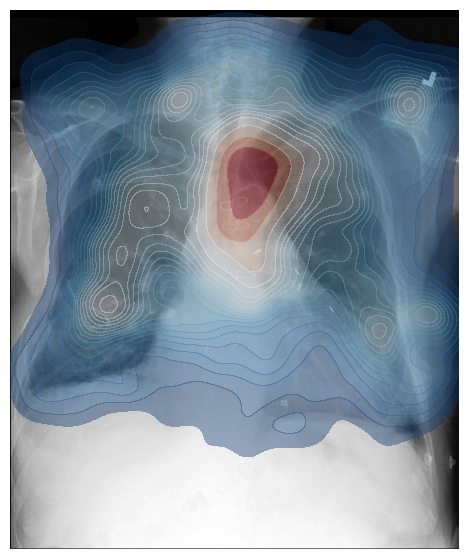

In [74]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "Normal") & (event_df["IS_SILENT?"] == 0) ]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)

plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


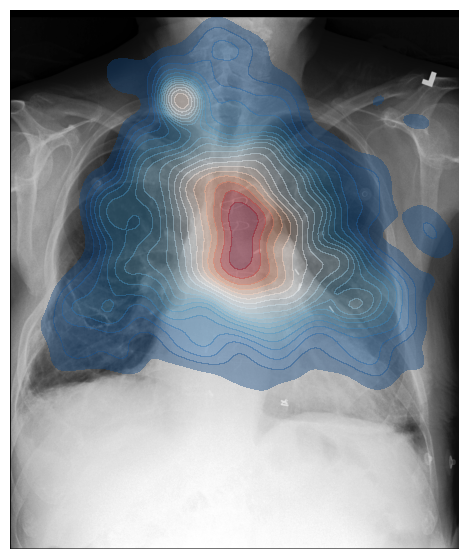

In [76]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "Pneumonia") & (event_df["IS_SILENT?"] == 1) ]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)

plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


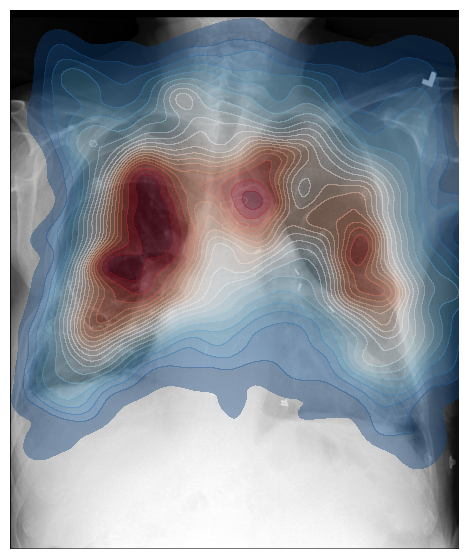

In [77]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "Pneumonia") & (event_df["IS_SILENT?"] == 0) ]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)

plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


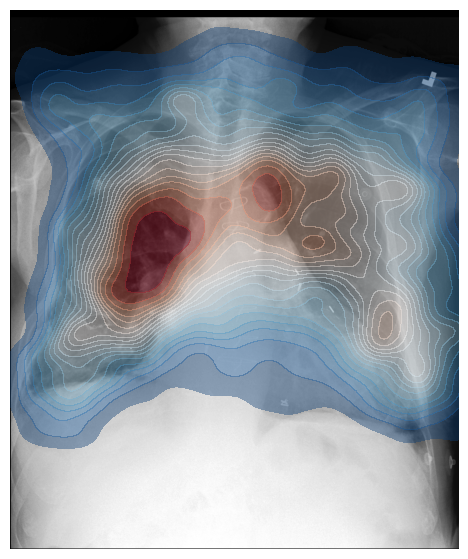

In [78]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "CHF") & (event_df["IS_SILENT?"] == 0) ]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)
plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


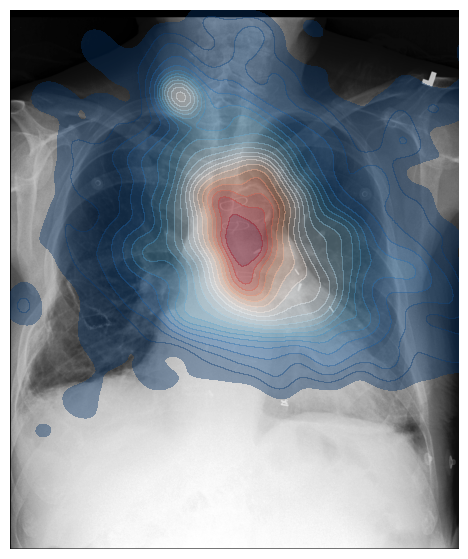

In [80]:
dataframe = event_df[ (event_df["DIAGNOSIS"] == "CHF") & (event_df["IS_SILENT?"] == 1) ]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)
plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


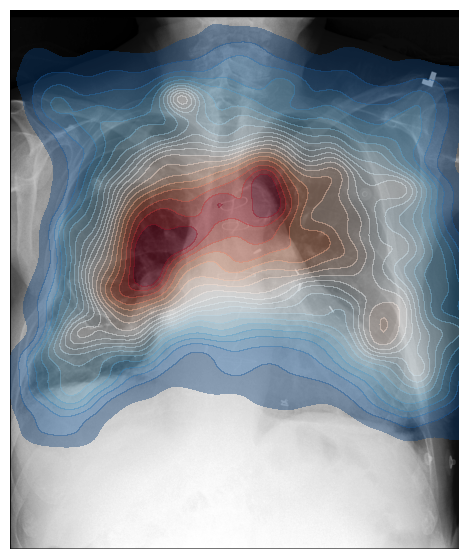

In [79]:
dataframe = event_df[ event_df["DIAGNOSIS"] == "CHF"]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)
plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


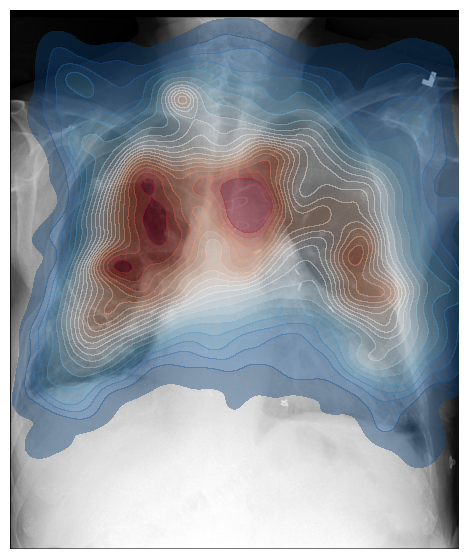

In [81]:
dataframe = event_df[ event_df["DIAGNOSIS"] == "Pneumonia"]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)
plt.show()


/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


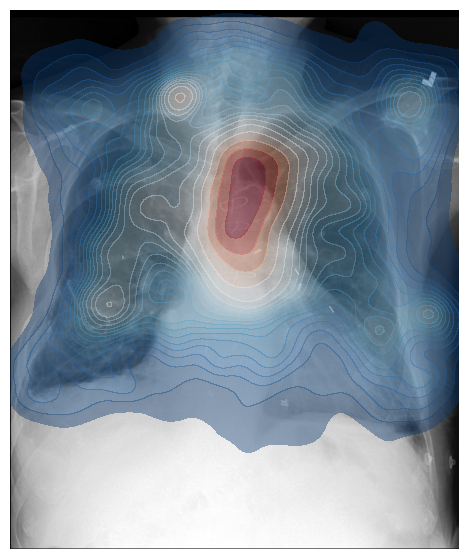

In [82]:
dataframe = event_df[ event_df["DIAGNOSIS"] == "Normal"]

plt.figure(figsize=(7,7))
plt.axis('off')

hmax = sns.kdeplot(dataframe.X_ORIGINAL.values, dataframe.Y_ORIGINAL.values, cmap="RdBu_r",n_levels=20, shade=True, alpha = 0.4 )
plt.imshow(plt.imread(base_xray), cmap=plt.cm.gray, alpha=1.0)
plt.show()


# Markov Chains

In [482]:
bbox_df.head()


dicom_id                bbox_name  \
0  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48       cardiac silhouette   
1  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48            left clavicle   
2  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48  left costophrenic angle   
3  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48    left hilar structures   
4  002da0d9-ce49c30d-4dfcc1f8-746d2401-d8044d48     left lower lung zone   

       x1      x2      y1      y2  
0  1007.0  1743.0  1278.0  2040.0  
1  1369.0  2363.0   309.0   671.0  
2  2105.0  2363.0  2156.0  2415.0  
3  1356.0  1782.0   865.0  1562.0  
4  1381.0  2247.0  1472.0  2363.0

In [487]:
bbox_df = pd.read_csv("/Volumes/SD_DISK/bounding_boxes.csv")
bbox_df.drop(["dicom_id"], axis=1, inplace=True)
bbox_df = bbox_df.groupby("bbox_name").mean()
bbox_df.reset_index(inplace=True)
bbox_df["cx"] = (bbox_df["x1"] + bbox_df["x2"])/2
bbox_df["cy"] = (bbox_df["y1"] + bbox_df["y2"])/2
bbox_df

bbox_name           x1           x2           y1  \
0         cardiac silhouette   974.843952  2067.131117  1386.308403   
1              left clavicle  1477.130556  2487.853704   344.757407   
2    left costophrenic angle  2248.345337  2519.783934  2090.135734   
3      left hilar structures  1407.155125  1859.939058  1025.853186   
4       left lower lung zone  1433.019391  2396.591874  1557.597415   
5                  left lung  1398.283472  2397.687904   363.877193   
6         left mid lung zone  1422.052632  2303.036934  1119.199446   
7       left upper lung zone  1414.222530  2234.182825   422.845799   
8             right clavicle   183.851852  1201.247222   348.175926   
9   right costophrenic angle   128.156971   387.072946  2082.463527   
10    right hilar structures   777.867959  1227.579871  1027.876270   
11     right lower lung zone   246.772853  1169.397969  1545.922438   
12                right lung   246.708218  1253.223453   361.489381   
13       right mid lung zone   353.929825  1208.734072  1118.771006   
14     right upper lung zone   427.103416  1249.907664   420.680517   
15                   trachea  1063.349954  1490.638966   187.760849   
16         upper mediastinum  1079.359187  1679.140351   623.267775   

             y2           cx           cy  
0   2191.570637  1520.987535  1788.939520  
1    780.442593  1982.492130   562.600000  
2   2372.092336  2384.064635  2231.114035  
3   1640.251154  1633.547091  1333.052170  
4   2330.204986  1914.805633  1943.901200  
5   2330.734995  1897.985688  1347.306094  
6   1557.533703  1862.544783  1338.366574  
7   1118.707295  1824.202678   770.776547  
8    786.436111   692.549537   567.306019  
9   2358.653740   257.614958  2220.558633  
10  1626.809788  1002.723915  1327.343029  
11  2297.033241   708.085411  1921.477839  
12  2297.191136   749.965836  1329.340259  
13  1545.720222   781.331948  1332.245614  
14  1118.492151   838.505540   769.586334  
15  1421.602031  1276.994460   804.681440  
16  1371.951062  1379.249769   997.609418

In [488]:
base_xray = "/Volumes/SD_DISK/XAMI-MIMICv2.0/patient_10002430/CXR-JPG/s53254222/4873aa08-977bfd31-fb492e64-6ef432d1-3f12cbe3.jpg"


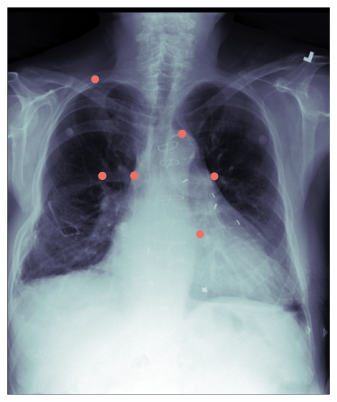

In [523]:
mediastinum = [ np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cy"].values[0],4)  ]
r_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cy"].values[0],4)  ]
l_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cy"].values[0],4)  ]
card_s = [ np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cy"].values[0],4)  ]
r_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cy"].values[0],4)  ]
l_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cy"].values[0],4)  ]
r_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cy"].values[0],4)  ]
l_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cy"].values[0],4)  ]

# plot an arrow that connects the two points mediastinum and r_hilar_struct

plt.figure(figsize=(7,7))
plt.axis('off')

# Med -> RHS ->  Med -> RHS -> Med
plt.scatter([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color="#EC7063", linewidth=2)
# Med -> LHS -> Med -> LHS -> Med
plt.scatter([mediastinum[0], l_hilar_struct[0]], [mediastinum[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
# CardS -> RHS -> CardS -> RHS -> CardS
plt.scatter([card_s[0], r_hilar_struct[0]], [card_s[1], r_hilar_struct[1]], color="#EC7063", linewidth=2)
# Med -> RHS -> Rlung -> Rclav -> Rlung
plt.scatter([r_hilar_struct[0], r_lung[0]], [r_hilar_struct[1], r_lung[1]], color="#EC7063", linewidth=2)
plt.scatter([r_lung[0], r_clavicle[0]], [r_lung[1], r_clavicle[1]], color="#EC7063", linewidth=2)

# save this image to afile

#plt.quiver(mediastinum[0], r_hilar_struct[0], mediastinum[1]-mediastinum[0], r_hilar_struct[1]-r_hilar_struct[0], angles='xy', scale_units='xy', scale=1, color='blue')

#plt.plot([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color='red', linewidth=2)
plt.imshow(plt.imread(base_xray), cmap=plt.cm.bone, alpha=1.0)

plt.savefig("/Volumes/SD_DISK/normal_silent_p1.png", bbox_inches='tight', pad_inches=0)



plt.show()




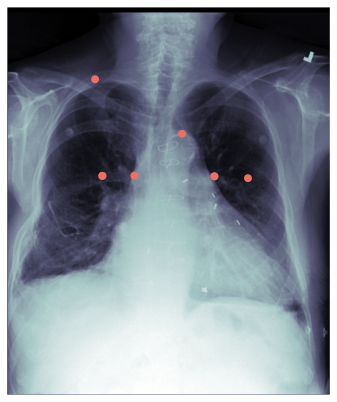

In [524]:
mediastinum = [ np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cy"].values[0],4)  ]
r_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cy"].values[0],4)  ]
l_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cy"].values[0],4)  ]
card_s = [ np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cy"].values[0],4)  ]
r_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cy"].values[0],4)  ]
l_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cy"].values[0],4)  ]
r_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cy"].values[0],4)  ]
l_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cy"].values[0],4)  ]

# plot an arrow that connects the two points mediastinum and r_hilar_struct

plt.figure(figsize=(7,7))
plt.axis('off')

#Rlung -> Rclav -> Rlung -> Rclav -> Rlung
plt.scatter([r_lung[0], r_clavicle[0]], [r_lung[1], r_clavicle[1]], color="#EC7063", linewidth=2)
# Med -> LHS -> Med -> LHS -> Med
plt.scatter([mediastinum[0], l_hilar_struct[0]], [mediastinum[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
# RHS -> Rlung -> RHS -> Rlung -> RHS
plt.scatter([r_hilar_struct[0], r_lung[0]], [r_hilar_struct[1], r_lung[1]], color="#EC7063", linewidth=2)
# Rlung -> RHS -> Med -> LHS -> Llung
plt.scatter([l_hilar_struct[0], l_lung[0]], [l_hilar_struct[1], l_lung[1]], color="#EC7063", linewidth=2)



# save this image to afile

#plt.quiver(mediastinum[0], r_hilar_struct[0], mediastinum[1]-mediastinum[0], r_hilar_struct[1]-r_hilar_struct[0], angles='xy', scale_units='xy', scale=1, color='blue')

#plt.plot([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color='red', linewidth=2)
plt.imshow(plt.imread(base_xray), cmap=plt.cm.bone, alpha=1.0)

plt.savefig("/Volumes/SD_DISK/normal_reporting.png", bbox_inches='tight', pad_inches=0)



plt.show()




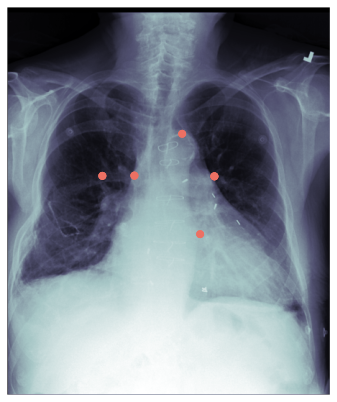

In [527]:
mediastinum = [ np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cy"].values[0],4)  ]
r_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cy"].values[0],4)  ]
l_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cy"].values[0],4)  ]
card_s = [ np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cy"].values[0],4)  ]
r_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cy"].values[0],4)  ]
l_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cy"].values[0],4)  ]
r_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cy"].values[0],4)  ]
l_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cy"].values[0],4)  ]

# plot an arrow that connects the two points mediastinum and r_hilar_struct

plt.figure(figsize=(7,7))
plt.axis('off')


# CardS -> LHS -> CardS -> LHS -> CardS
plt.scatter([card_s[0], l_hilar_struct[0]], [card_s[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
# Med -> LHS -> CardS -> LHS -> CardS
plt.scatter([mediastinum[0], l_hilar_struct[0]], [mediastinum[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
plt.scatter([l_hilar_struct[0], card_s[0]], [l_hilar_struct[1], card_s[1]], color="#EC7063", linewidth=2)

# Rlung -> RHS -> Rlung -> RHS -> Rlung
plt.scatter([r_lung[0], r_hilar_struct[0]], [r_lung[1], r_hilar_struct[1]], color="#EC7063", linewidth=2)
# Med -> LHS -> Med -> LHS -> Med
plt.scatter([mediastinum[0], l_hilar_struct[0]], [mediastinum[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
# RHS -> Rlung -> RHS -> Rlung -> RHS
plt.scatter([r_hilar_struct[0], r_lung[0]], [r_hilar_struct[1], r_lung[1]], color="#EC7063", linewidth=2)
# Rlung -> RHS -> Med -> LHS -> Llung
plt.scatter([r_hilar_struct[0], r_lung[0]], [r_hilar_struct[1], r_lung[1]], color="#EC7063", linewidth=2)

# save this image to afile

#plt.quiver(mediastinum[0], r_hilar_struct[0], mediastinum[1]-mediastinum[0], r_hilar_struct[1]-r_hilar_struct[0], angles='xy', scale_units='xy', scale=1, color='blue')

#plt.plot([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color='red', linewidth=2)
plt.imshow(plt.imread(base_xray), cmap=plt.cm.bone, alpha=1.0)

plt.savefig("/Volumes/SD_DISK/pneumonia_silent.png", bbox_inches='tight', pad_inches=0)



plt.show()




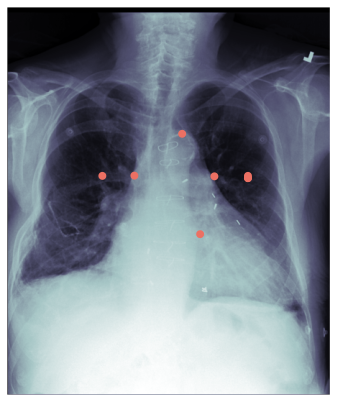

In [528]:
mediastinum = [ np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cy"].values[0],4)  ]
r_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cy"].values[0],4)  ]
l_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cy"].values[0],4)  ]
card_s = [ np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cy"].values[0],4)  ]
r_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cy"].values[0],4)  ]
l_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cy"].values[0],4)  ]
r_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cy"].values[0],4)  ]
l_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cy"].values[0],4)  ]

# plot an arrow that connects the two points mediastinum and r_hilar_struct

plt.figure(figsize=(7,7))
plt.axis('off')


# RHS -> Rlung -> RHS -> Rlung -> LHS
plt.scatter([r_lung[0], r_hilar_struct[0]], [r_lung[1], r_hilar_struct[1]], color="#EC7063", linewidth=2)
plt.scatter([l_hilar_struct[0], l_lung[0]], [l_hilar_struct[1], r_lung[1]], color="#EC7063", linewidth=2)
# CardS -> Llung -> CardS -> Llung -> CardS
plt.scatter([card_s[0], l_lung[0]], [card_s[1], l_lung[1]], color="#EC7063", linewidth=2)
# Rlung -> RHS -> Med -> LHS -> Llung
plt.scatter([mediastinum[0], l_lung[0]], [mediastinum[1], l_lung[1]], color="#EC7063", linewidth=2)
# RHS -> Rlung -> RHS -> Med -> LHS



# save this image to afile

#plt.quiver(mediastinum[0], r_hilar_struct[0], mediastinum[1]-mediastinum[0], r_hilar_struct[1]-r_hilar_struct[0], angles='xy', scale_units='xy', scale=1, color='blue')

#plt.plot([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color='red', linewidth=2)
plt.imshow(plt.imread(base_xray), cmap=plt.cm.bone, alpha=1.0)

plt.savefig("/Volumes/SD_DISK/pneumonia_reporting.png", bbox_inches='tight', pad_inches=0)



plt.show()




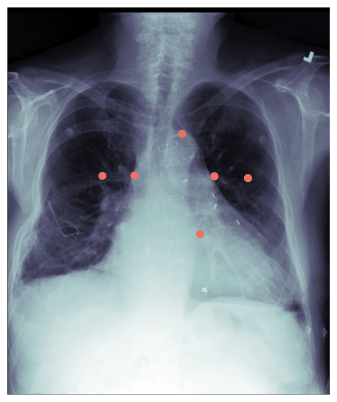

In [530]:
mediastinum = [ np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "upper mediastinum" ]["cy"].values[0],4)  ]
r_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right hilar structures" ]["cy"].values[0],4)  ]
l_hilar_struct = [ np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left hilar structures" ]["cy"].values[0],4)  ]
card_s = [ np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "cardiac silhouette" ]["cy"].values[0],4)  ]
r_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right lung" ]["cy"].values[0],4)  ]
l_lung = [ np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left lung" ]["cy"].values[0],4)  ]
r_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "right clavicle" ]["cy"].values[0],4)  ]
l_clavicle =  [ np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cx"].values[0],4), np.round(bbox_df[ bbox_df.bbox_name == "left clavicle" ]["cy"].values[0],4)  ]

# plot an arrow that connects the two points mediastinum and r_hilar_struct

plt.figure(figsize=(7,7))
plt.axis('off')



# RHS -> Rlung -> RHS -> Rlung -> RHS
plt.scatter([r_lung[0], r_hilar_struct[0]], [r_lung[1], r_hilar_struct[1]], color="#EC7063", linewidth=2)
# Rlung -> RHS -> Med -> LHS -> Llung
plt.scatter([mediastinum[0], l_hilar_struct[0]], [mediastinum[1], l_hilar_struct[1]], color="#EC7063", linewidth=2)
plt.scatter([l_hilar_struct[0], l_lung[0]], [l_hilar_struct[1], l_lung[1]], color="#EC7063", linewidth=2)

# CardS -> Llung -> CardS -> Llung -> CardS
plt.scatter([card_s[0], l_lung[0]], [card_s[1], l_lung[1]], color="#EC7063", linewidth=2)


# save this image to afile

#plt.quiver(mediastinum[0], r_hilar_struct[0], mediastinum[1]-mediastinum[0], r_hilar_struct[1]-r_hilar_struct[0], angles='xy', scale_units='xy', scale=1, color='blue')

#plt.plot([mediastinum[0], r_hilar_struct[0]], [mediastinum[1], r_hilar_struct[1]], color='red', linewidth=2)
plt.imshow(plt.imread(base_xray), cmap=plt.cm.bone, alpha=1.0)

plt.savefig("/Volumes/SD_DISK/chf_report.png", bbox_inches='tight', pad_inches=0)



plt.show()




In [520]:
events = event_df.MIN_INTERSECTION_AREA.unique()

In [449]:
mapping ={bigram: str(i) for i, bigram in enumerate(events)}
mapping["START"] = 10
mapping["END"] = 11

In [450]:
mapping

{'upper mediastinum': '0',
 'right hilar structures': '1',
 'right lung': '2',
 'right clavicle': '3',
 'cardiac silhouette': '4',
 'left hilar structures': '5',
 'left lung': '6',
 'left clavicle': '7',
 'left costophrenic angle': '8',
 'right costophrenic angle': '9',
 'START': 10,
 'END': 11}

In [480]:
event_df = pd.read_csv("/Volumes/SD_DISK/timestamps_GENERAL.csv")

event_df = event_df[ event_df.MIN_INTERSECTION_AREA != "Area Out of Bounding Boxes" ]

event_df_normal_s = event_df[ (event_df.DIAGNOSIS == "Normal") & (event_df["IS_SILENT?"] == 1) ]
event_df_normal_r = event_df[ (event_df.DIAGNOSIS == "Normal") & (event_df["IS_SILENT?"] == 0) ]

event_df_pneumonia_s = event_df[ (event_df.DIAGNOSIS == "Pneumonia") & (event_df["IS_SILENT?"] == 1) ]
event_df_pneumonia_r = event_df[ (event_df.DIAGNOSIS == "Pneumonia") & (event_df["IS_SILENT?"] == 0) ]

event_df_chf_s = event_df[ (event_df.DIAGNOSIS == "CHF") & (event_df["IS_SILENT?"] == 1) ]
event_df_chf_r = event_df[ (event_df.DIAGNOSIS == "CHF") & (event_df["IS_SILENT?"] == 0) ]


streamdata_normal_s = []
dicoms = event_df_normal_s.CASE_ID.unique()
for dicom in dicoms:
  case = event_df_normal_s[event_df_normal_s["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_normal_s.append( list(case) )
  
streamdata_normal_r = []
dicoms = event_df_normal_r.CASE_ID.unique()
for dicom in dicoms:
  
  case = event_df_normal_r[event_df_normal_r["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_normal_r.append( list( case ) )


streamdata_pneumonia_s = []
dicoms = event_df_pneumonia_s.CASE_ID.unique()
for dicom in dicoms:
  case = event_df_pneumonia_s[event_df_pneumonia_s["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_pneumonia_s.append( list(case) )
  
streamdata_pneumonia_r = []
dicoms = event_df_pneumonia_r.CASE_ID.unique()
for dicom in dicoms:
  
  case = event_df_pneumonia_r[event_df_pneumonia_r["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_pneumonia_r.append( list( case ) )


streamdata_chf_s = []
dicoms = event_df_chf_s.CASE_ID.unique()
for dicom in dicoms:
  case = event_df_chf_s[event_df_chf_s["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_chf_s.append( list(case) )
  
streamdata_chf_r = []
dicoms = event_df_chf_r.CASE_ID.unique()
for dicom in dicoms:
  
  case = event_df_chf_r[event_df_chf_r["CASE_ID"] == dicom].MIN_INTERSECTION_AREA.values
  case = np.insert(case, 0, "START")
  case = np.append(case, "END")
  case = [mapping[c] for c in case]
  streamdata_chf_r.append( list( case ) )



In [481]:
import pickle as plk

plk.dump(streamdata_normal_s, open("streamdata_normal_s_gen.pkl", "wb"))
plk.dump(streamdata_normal_r, open("streamdata_normal_r_gen.pkl", "wb"))

plk.dump(streamdata_pneumonia_s, open("streamdata_pneumonia_s_gen.pkl", "wb"))
plk.dump(streamdata_pneumonia_r, open("streamdata_pneumonia_r_gen.pkl", "wb"))

plk.dump(streamdata_chf_s, open("streamdata_chf_s_gen.pkl", "wb"))
plk.dump(streamdata_chf_r, open("streamdata_chf_r_gen.pkl", "wb"))


In [423]:
!pip3 install scipy==1.7.3

In [421]:
# check version of scipy
import scipy
print(scipy.__version__)

1.9.1


In [396]:

import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
streamdata_normal_r

In [ ]:
from markovclick.models import MarkovClickstream

m_normal_s = MarkovClickstream(streamdata_normal_s)
m_normal_r = MarkovClickstream(streamdata_normal_r)




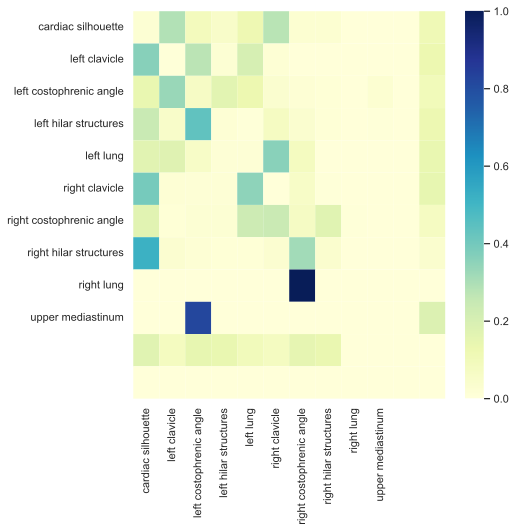

In [444]:
h = sns.heatmap(m_normal_s.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="YlGnBu")


<AxesSubplot:>

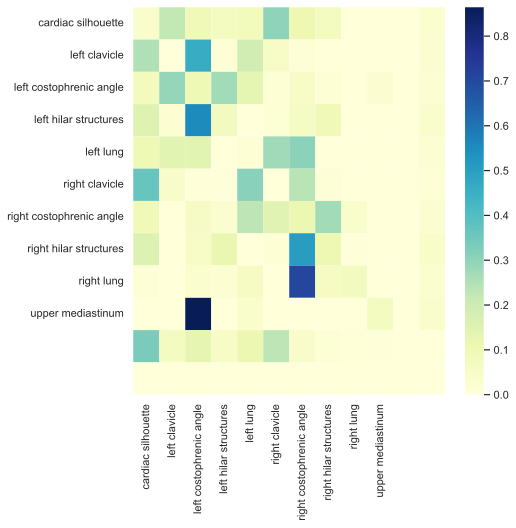

In [445]:
sns.heatmap(m_normal_r.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="YlGnBu")


# PROCESS MINIG

In [454]:
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer

In [468]:
event_df = pd.read_csv("/Volumes/SD_DISK/timestamps_GENERAL.csv")
event_df = event_df[ event_df.MIN_INTERSECTION_AREA != "Area Out of Bounding Boxes"]
#event_df.drop(["Unnamed: 0"], axis=1, inplace=True)
event_df.columns

Index(['CASE_ID', 'MEDIA_ID', 'SESSION_ID', 'Time (in secs)', 'X_ORIGINAL',
       'Y_ORIGINAL', 'PUPIL', 'START_TIMESTAMP', 'END_TIMESTAMP',
       'ALL_INTERSECTIONS', 'MIN_INTERSECTION_AREA', 'MAX_INTERSECTION_AREA',
       'IS_SILENT?', 'DIAGNOSIS'],
      dtype='object')

In [469]:
eventlog = event_df.copy()

In [470]:
event_log_silent_normal = eventlog[ (eventlog.DIAGNOSIS == "Normal")  & (eventlog["IS_SILENT?"] == 1) ].copy()
event_log_reporting_normal = eventlog[ (eventlog.DIAGNOSIS == "Normal")  & (eventlog["IS_SILENT?"] == 0) ].copy()
event_log_silent_pneumonia = eventlog[ (eventlog.DIAGNOSIS == "Pneumonia")  & (eventlog["IS_SILENT?"] == 1) ].copy()
event_log_reporting_pneumonia = eventlog[ (eventlog.DIAGNOSIS == "Pneumonia")  & (eventlog["IS_SILENT?"] == 0) ].copy()
event_log_silent_chf = eventlog[ (eventlog.DIAGNOSIS == "CHF")  & (eventlog["IS_SILENT?"] == 1) ].copy()
event_log_reporting_chf = eventlog[ (eventlog.DIAGNOSIS == "CHF")  & (eventlog["IS_SILENT?"] == 0) ].copy()

In [471]:

event_log_silent_normal.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_silent_normal.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)

event_log_reporting_normal.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_reporting_normal.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)

event_log_silent_pneumonia.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_silent_pneumonia.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)

event_log_reporting_pneumonia.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_reporting_pneumonia.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)

event_log_silent_chf.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_silent_chf.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)

event_log_reporting_chf.rename(columns={'START_TIMESTAMP': 'time:timestamp',
'CASE_ID': 'case:concept:name', 'MIN_INTERSECTION_AREA': 'concept:name', 'IS_SILENT?': 'org:resource'}, inplace=True)
event_log_reporting_chf.drop(["MEDIA_ID", "SESSION_ID", "Time (in secs)", "X_ORIGINAL", "Y_ORIGINAL", "PUPIL", "ALL_INTERSECTIONS", "MAX_INTERSECTION_AREA"], axis=1, inplace=True)


In [472]:
## Convert to log format 
log_silent_normal = log_converter.apply(event_log_silent_normal)
log_reporting_normal = log_converter.apply(event_log_reporting_normal)
log_silent_pneumonia = log_converter.apply(event_log_silent_pneumonia)
log_reporting_pneumonia = log_converter.apply(event_log_reporting_pneumonia)
log_silent_chf = log_converter.apply(event_log_silent_chf)
event_log_reporting_chf = log_converter.apply(event_log_reporting_chf)


/var/folders/8j/jql_tttd2zg2dtk72cy8h9cc0000gn/T/ipykernel_64447/2993731381.py:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities= pm4py.discover_dfg(log_silent_normal)
/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


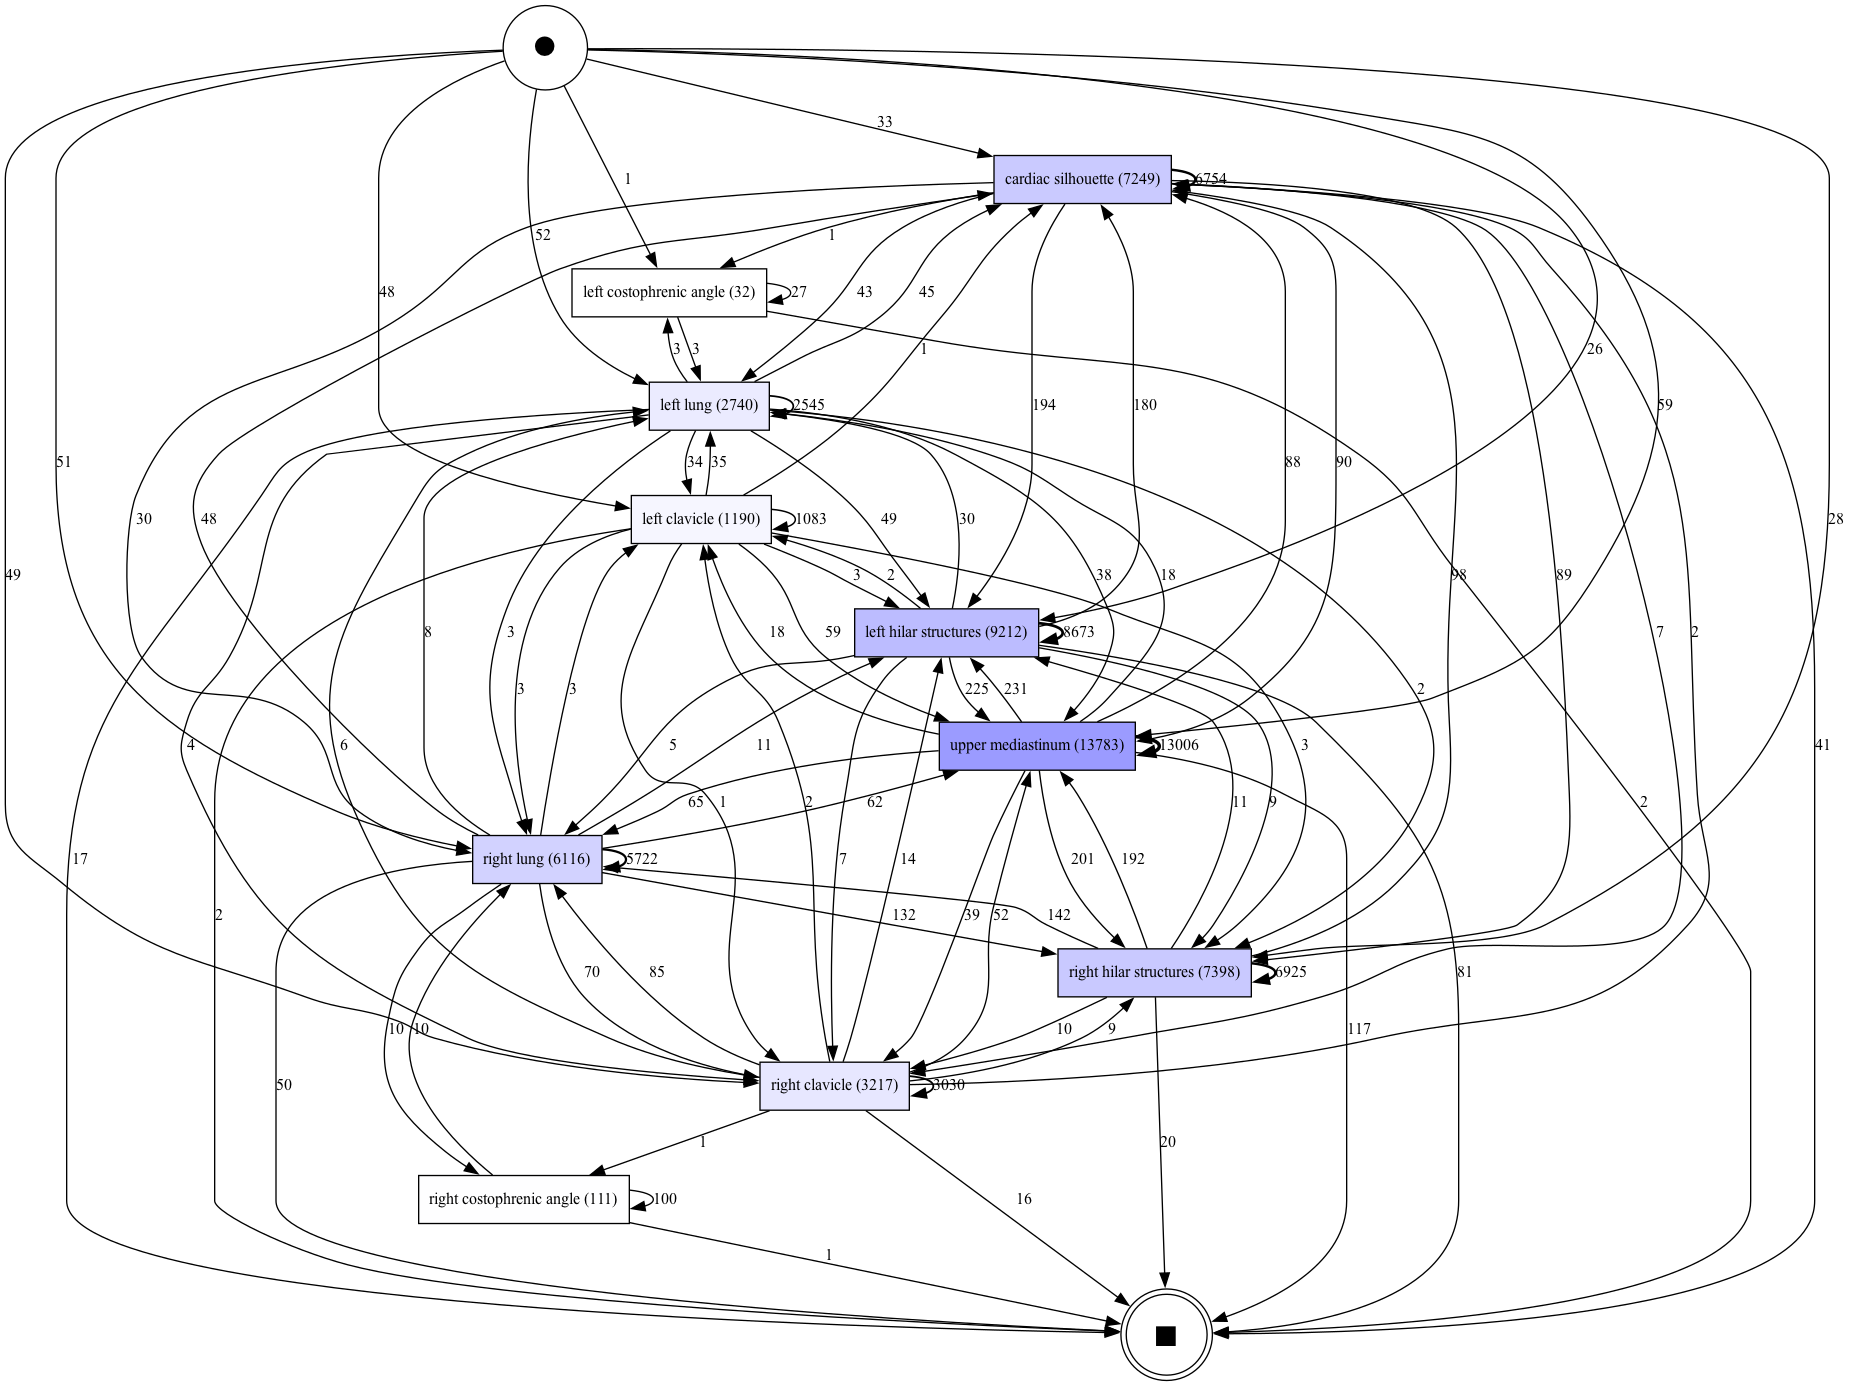

In [473]:
dfg, start_activities, end_activities= pm4py.discover_dfg(log_silent_normal)
pm4py.view_dfg(dfg, start_activities, end_activities)

/var/folders/8j/jql_tttd2zg2dtk72cy8h9cc0000gn/T/ipykernel_64447/236871771.py:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities= pm4py.discover_dfg(log_reporting_normal)
/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


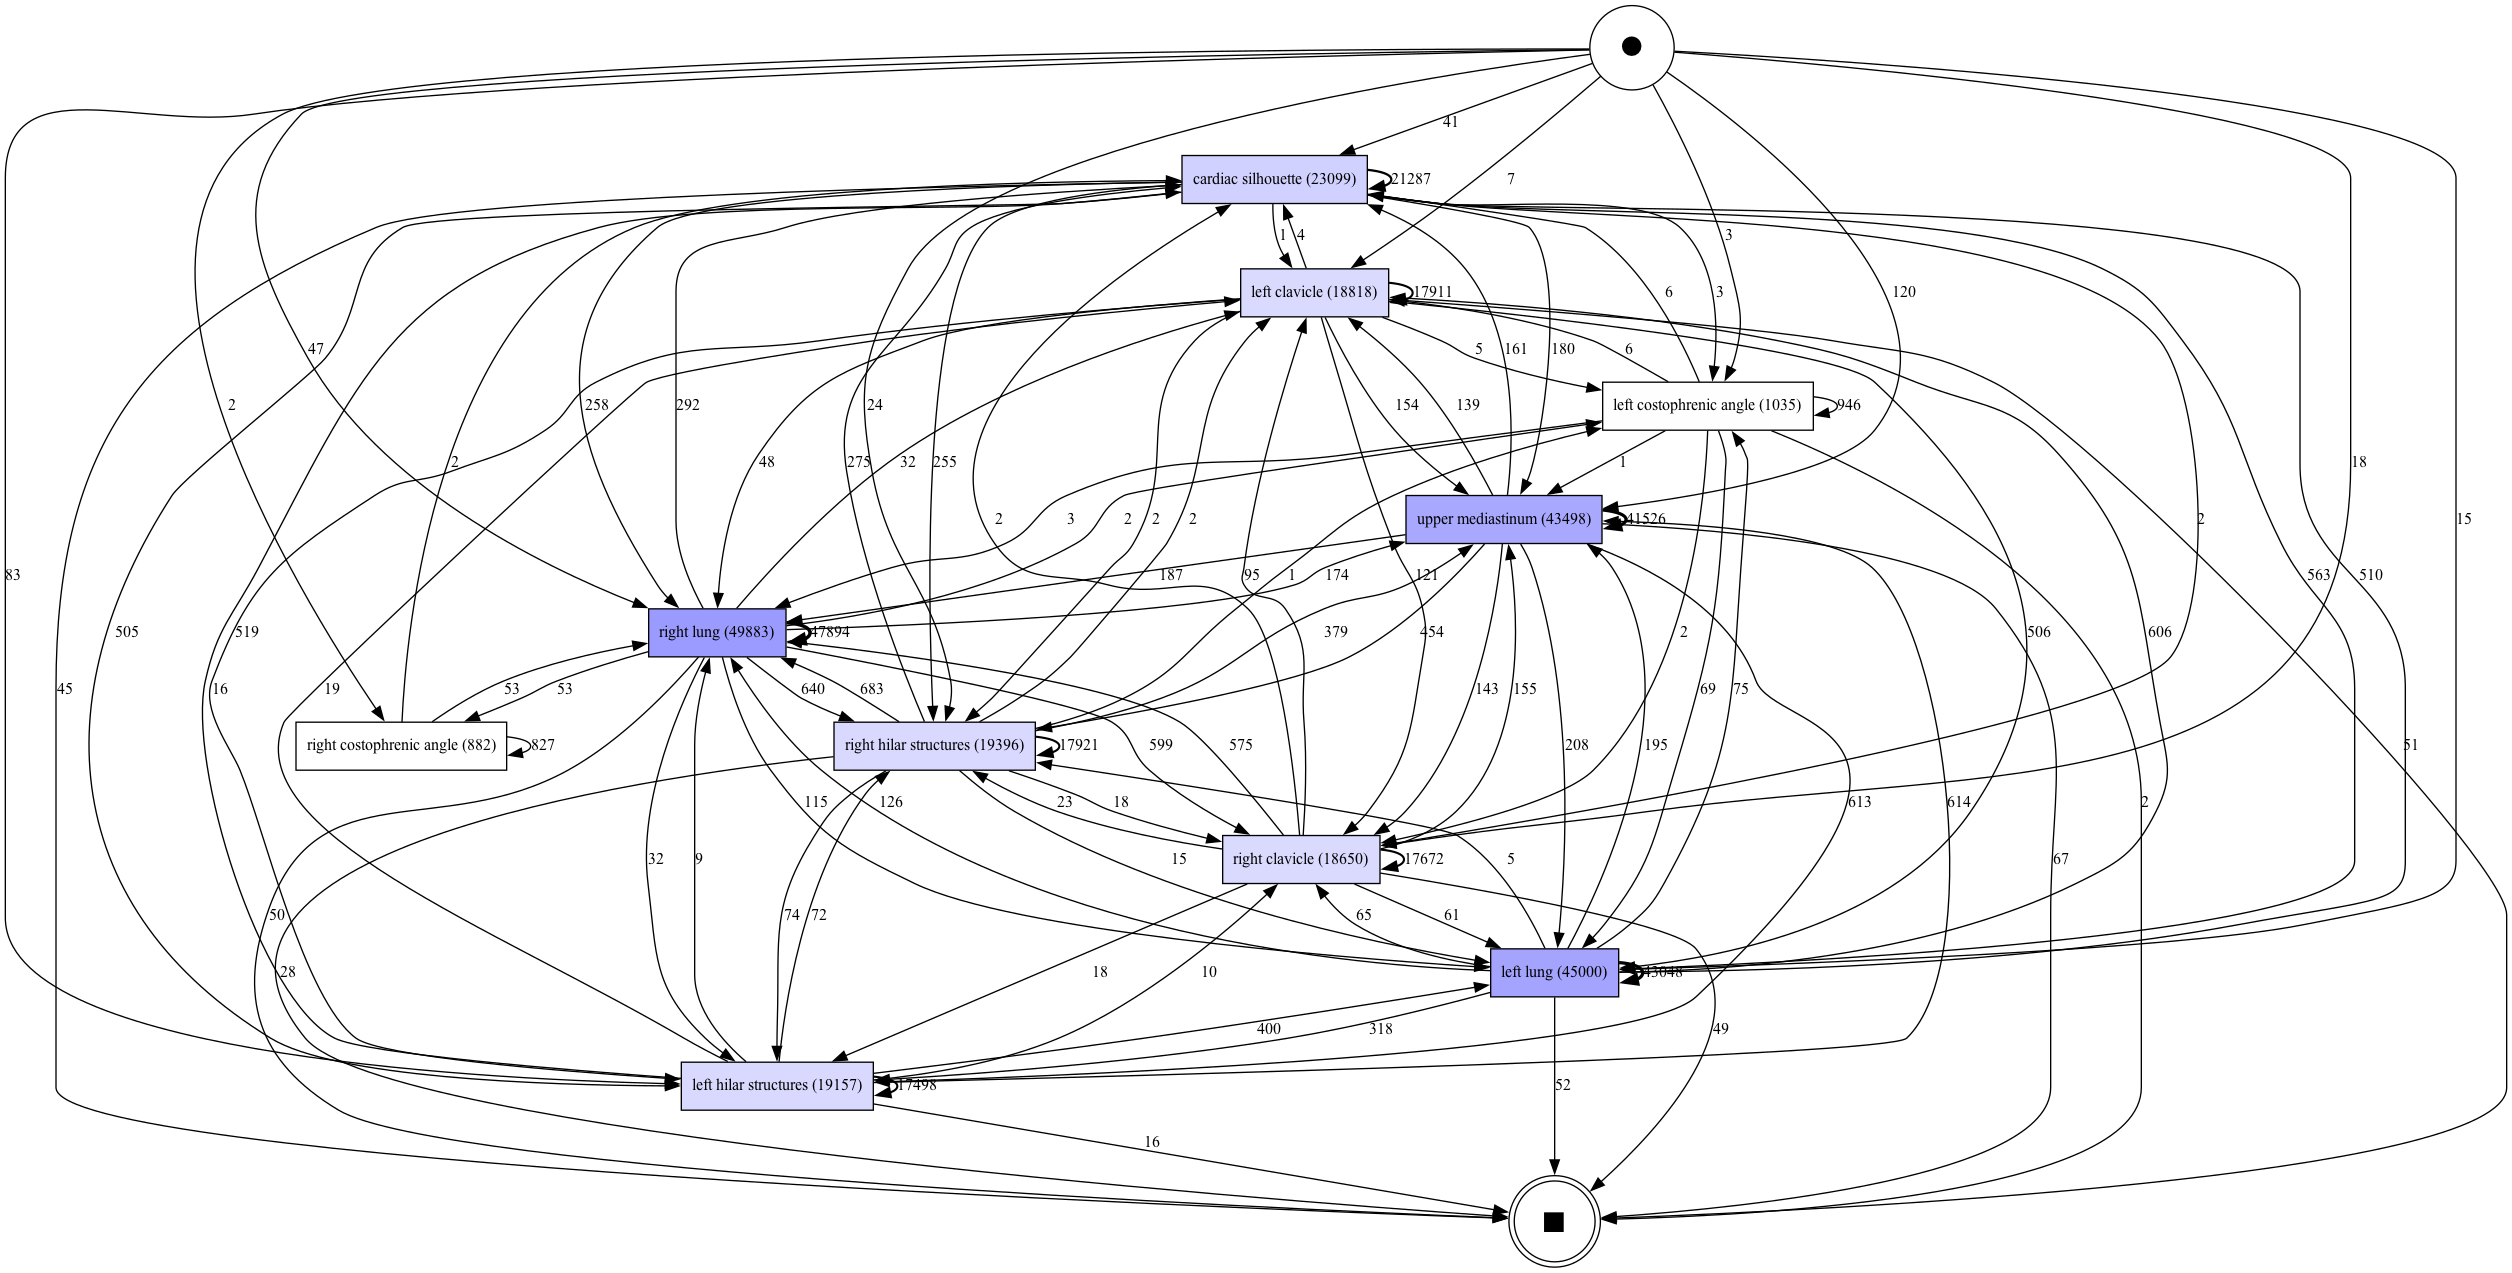

In [474]:
dfg, start_activities, end_activities= pm4py.discover_dfg(log_reporting_normal)
pm4py.view_dfg(dfg, start_activities, end_activities)

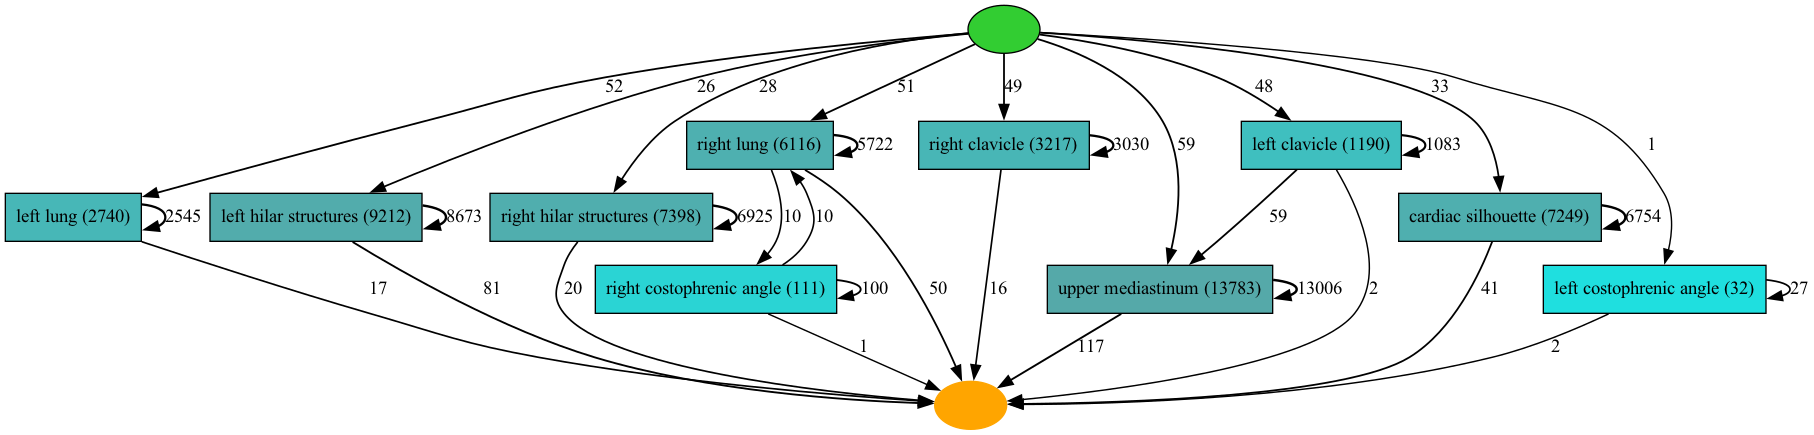

In [475]:
map = pm4py.discover_heuristics_net(log_silent_normal)
pm4py.view_heuristics_net(map)

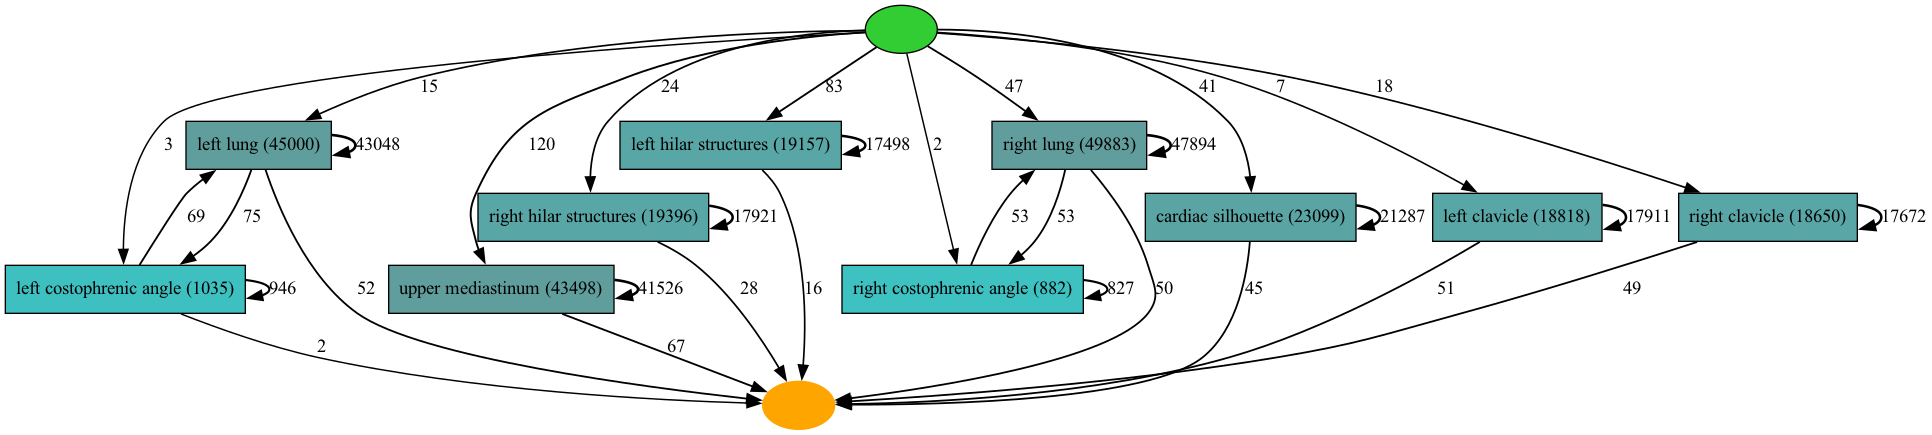

In [476]:
map = pm4py.discover_heuristics_net(log_reporting_normal)
pm4py.view_heuristics_net(map)

/usr/local/anaconda3/envs/pytorch/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


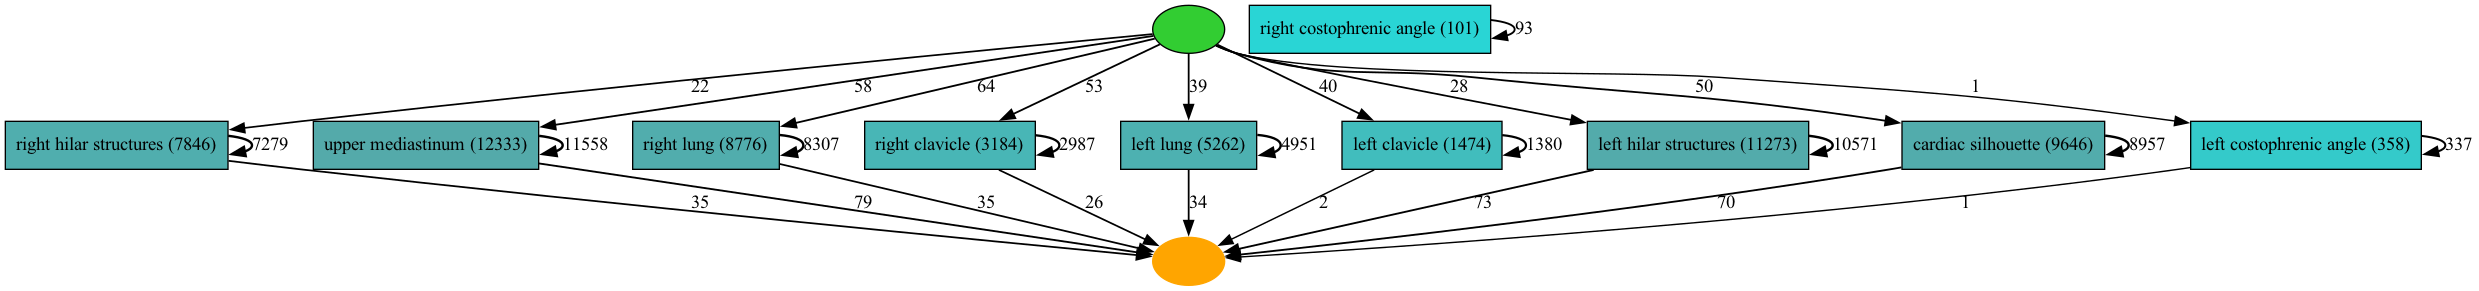

In [477]:
map = pm4py.discover_heuristics_net(log_silent_pneumonia)
pm4py.view_heuristics_net(map)

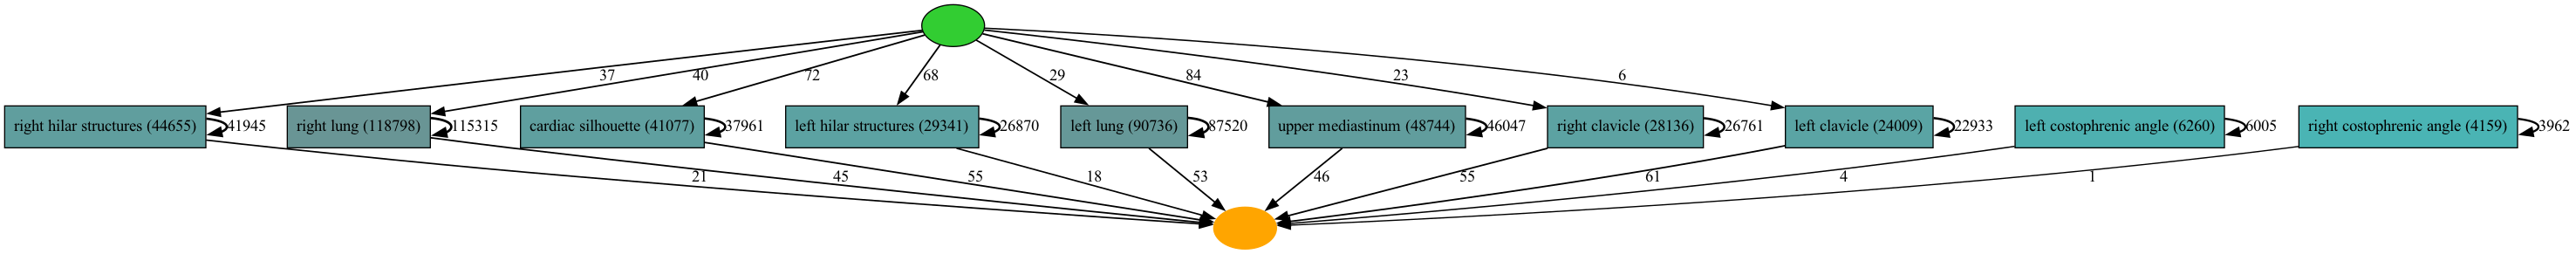

In [478]:
map = pm4py.discover_heuristics_net(log_reporting_pneumonia)
pm4py.view_heuristics_net(map)

In [479]:
def dict2html(di1,di2=None):
    res= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di1.items()])
    if di2 is not None:
        res+="<br/><br/>"
        res+= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di2.items()])
    return res


In [467]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as gcm